## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Опишите данные: <br>
1.  Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2.  Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3.  Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно 
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


In [1]:
# импорт нужных библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
import calendar

In [2]:
# выгрузка данных из файла courses.csv
courses = pd.read_csv('courses.csv', index_col=0)

# переименование столбцов
courses.columns = ['id', 'course_title', 'course_field']
courses.head(3)

,id,course_title,course_field
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
1,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design
2,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business


In [3]:
# выгрузка данных из файла students.csv
students = pd.read_csv('students.csv')
students.head(3)

,id_,id,city,birthday
0,1325,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaN
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
2,8972,2033122d7c9b24b36eebc468d5259642,NaN,NaN


In [4]:
# удаление столбца id_ из датасета students
students = students.drop(columns='id_')

In [5]:
# выгрузка данных из файла course_contents.csv
course_contents = pd.read_csv('course_contents.csv')
course_contents.head(3)

,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework
0,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",1,Знакомство,aa344de3-1191-4e69-b485-61823118f71c,True,False
1,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",2,"Введение в Motion Design. Тренды, разновидност...",246c8429-dd18-4f3a-a9fb-d3c07e7d6912,True,False
2,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",3,Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True


In [6]:
# выгрузка данных из файла progresses.csv
progresses = pd.read_csv('progresses.csv')
progresses.head(3)

,id,student_id,course_id
0,8459fbc07e32ec92bd7b43d7df9bfa89,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1
1,a9d173142534e33ce39146017f9c6835,e24062de06d301937b3b3a8e383e3e21,bf27a4bf4ada4c756451703ea62a914f
2,da26551a71cd62bbab844e3e54af7f71,35a36d90b745992b59085c8d54a072e7,6e4837f0a65c68efbfdd0594d6774701


In [7]:
# выгрузка данных из файла progress_phases.csv
progress_phases = pd.read_csv('C:/my_jupiter/Skillbox/01_Coursework_analytics/progress_phases.csv') 
progress_phases.head(3)

,progress_id,module_number,lesson_number,status,start_date,finish_date
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00


In [8]:
# объединение датасетов progress_phases и progresses в один датасет first_merge
first_merge = pd.merge(progress_phases, progresses, left_on='progress_id', right_on='id', how='left')

# удаление лишнего столбца id из first_merge
first_merge = first_merge.drop(columns='id')
first_merge.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b


In [9]:
# объединение датасетов first_merge и courses в один датасет second_merge
second_merge = pd.merge(first_merge, courses, left_on='course_id', right_on='id', how='left')

# удаление лишнего столбца id из second_merge
second_merge = second_merge.drop(columns='id')
second_merge.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design


In [10]:
# финальное объединение с датасетом course_contents
main = second_merge.merge(course_contents, on=['course_id', 'module_number', 'lesson_number'], how='left')
main.head(5)

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


In [11]:
# информация о датасете
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   progress_id    350677 non-null  object
 1   module_number  350677 non-null  int64 
 2   lesson_number  350677 non-null  int64 
 3   status         350677 non-null  object
 4   start_date     350677 non-null  object
 5   finish_date    334508 non-null  object
 6   student_id     350677 non-null  object
 7   course_id      350677 non-null  object
 8   course_title   350677 non-null  object
 9   course_field   350677 non-null  object
 10  module_title   350677 non-null  object
 11  lesson_title   350677 non-null  object
 12  lesson_token   350677 non-null  object
 13  is_video       350677 non-null  bool  
 14  is_homework    350677 non-null  bool  
dtypes: bool(2), int64(2), object(11)
memory usage: 38.1+ MB


## Задание 1.1

In [12]:
# общее количество курсов в датасете
main['course_title'].nunique()

15

In [13]:
# количество модулей на каждом курсе
main.groupby('course_title', as_index=False)['module_title'].nunique() \
    .rename(columns={'module_title': 'num_of_modules'}) \
    .sort_values('num_of_modules')

,course_title,num_of_modules
4,PHP-разработчик с 0 до PRO. Часть 1,8
8,Веб-вёрстка для начинающих 2.0,8
0,Excel Базовый,9
2,Java-разработчик c нуля,9
5,SMM-маркетолог от А до Я,11
1,Java-разработчик,17
9,Веб-дизайн PRO 2.0,17
10,Веб-дизайн Базовый,17
14,Руководитель digital-проектов,17
3,JavaScript с нуля,18


In [14]:
# количество уроков в каждом модуле на каждом курсе
main.groupby(['course_title', 'module_title'], as_index=False)['lesson_title'].nunique() \
    .rename(columns={'lesson_title': 'num_of_lessons'}).head()

,course_title,module_title,num_of_lessons
0,Excel Базовый,Визуализация данных Excel,5
1,Excel Базовый,Основной функционал Excel,11
2,Excel Базовый,Основной функционал Excel (продолжение),7
3,Excel Базовый,Сводные таблицы Excel,5
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,5


In [15]:
# медианное количество уроков в модуле на каждом курсе
main.groupby(['course_title', 'module_title'], as_index=False)['lesson_title'].nunique() \
    .groupby('course_title').median() \
    .rename(columns={'lesson_title': 'median'}) \
    .sort_values('median')

,median
course_title,
Веб-разработчик,2.0
Анимация интерфейсов,3.0
Веб-дизайн Базовый,3.0
UX-дизайн,3.5
PHP-разработчик с 0 до PRO. Часть 1,4.0
Веб-дизайн с нуля 2.0,4.0
Excel Базовый,5.0
Веб-дизайн PRO 2.0,5.0
Руководитель digital-проектов,5.0


In [16]:
# количество учеников на каждом курсе
main.groupby(['course_title'], as_index=False)['student_id'].nunique() \
    .rename(columns={'student_id': 'num_of_students'}) \
    .sort_values('num_of_students')

,course_title,num_of_students
5,SMM-маркетолог от А до Я,506
10,Веб-дизайн Базовый,518
2,Java-разработчик c нуля,581
7,Анимация интерфейсов,598
12,Веб-разработчик,628
14,Руководитель digital-проектов,685
1,Java-разработчик,763
0,Excel Базовый,782
4,PHP-разработчик с 0 до PRO. Часть 1,854
3,JavaScript с нуля,966


In [17]:
# минимальный, максимальный, средний, медианный возраст студентов

# проверка формата столбца birthday
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43830 entries, 0 to 43829
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        43830 non-null  object
 1   city      13162 non-null  object
 2   birthday  25499 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [18]:
# меняем формат столбца birthday с object на datetime
# если будут некорректно записана дата - замена на NaT
students['birthday'] = pd.to_datetime(students['birthday'], errors='coerce')

In [19]:
# проверка формата столбца birthday
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43830 entries, 0 to 43829
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        43830 non-null  object        
 1   city      13162 non-null  object        
 2   birthday  25490 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.0+ MB


In [20]:
# удаление строк с пропусками
students = students.dropna()

In [21]:
# при обзоре столбца обнаружились даты, которые не могут быть
students['birthday'].apply(['min', 'max'])

min   1884-09-23
max   2199-10-07
Name: birthday, dtype: datetime64[ns]

**При обзоре столбца birthday обнаружились даты, которые не могут быть, например минимальный год рождения 1884 и максимальный 2199. По максимальной дате все просто - не может быть год рождения больше текущей даты(да и врядли будут студенты, которые зарегестрировались уже с рождения). Поэтому возьмем возраст студентов от 18 до 100 лет**

In [22]:
# фильтруем года рождения
students = students[(students['birthday'] > '1921') & (students['birthday'] < '2003')]
students.min()

id          0007e271c3f2f20ff8675df9d81e0401
city                             Arkhangelsk
birthday                 1922-12-04 00:00:00
dtype: object

In [23]:
# создаем новый столбец age, где переводим год рождения в текущий возраст
students['age'] = (pd.to_datetime('now') - students['birthday']).astype('<m8[Y]').astype('int')
students.head()

,id,city,birthday,age
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,41
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,29
8,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,33
11,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16,32
15,d15a188c90bb4d83957ac14de78fada4,Санкт-Петербург,1991-01-16,30


In [24]:
print(f'Минимальный возраст студента: {students.age.min()}\n'
      f'Максимальный возраст студента: {students.age.max()}\n'
      f'Средний возраст студента: {students.age.mean()}\n'
      f'Медианный возраст студента: {students.age.median()}')

Минимальный возраст студента: 18
Максимальный возраст студента: 98
Средний возраст студента: 30.632721352989055
Медианный возраст студента: 30.0


In [25]:
# минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

# создание отдельного датасета путем объединение основного датасета с датасетом со студентами
age_students = pd.merge(main, students, left_on='student_id', right_on='id', how='left')
age_students.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework,id,city,birthday,age
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,768c2987a744c51ce64a5993a2a94eaf,Санкт-Петербург,1984-11-30,36.0
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False,768c2987a744c51ce64a5993a2a94eaf,Санкт-Петербург,1984-11-30,36.0
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False,768c2987a744c51ce64a5993a2a94eaf,Санкт-Петербург,1984-11-30,36.0
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False,768c2987a744c51ce64a5993a2a94eaf,Санкт-Петербург,1984-11-30,36.0
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,768c2987a744c51ce64a5993a2a94eaf,Санкт-Петербург,1984-11-30,36.0


In [26]:
# минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

age_students.groupby('course_title').agg(['min', 'max', 'mean', 'median'])['age']

,min,max,mean,median
course_title,,,,
Excel Базовый,18.0,61.0,33.904128,34.0
Java-разработчик,18.0,65.0,30.634095,29.0
Java-разработчик c нуля,18.0,55.0,30.422054,30.0
JavaScript с нуля,18.0,60.0,29.130387,28.0
PHP-разработчик с 0 до PRO. Часть 1,18.0,75.0,31.640635,30.0
SMM-маркетолог от А до Я,18.0,52.0,29.302703,28.0
UX-дизайн,18.0,85.0,31.003058,30.0
Анимация интерфейсов,18.0,52.0,30.459679,30.0
Веб-вёрстка для начинающих 2.0,18.0,60.0,29.293501,28.0


**есть несоответсвие. есть студенты, которые не записаны ни на один курс. То есть их id нет в таблице progresses.csv. Поэтому максимальный возраст по всем студентам 98 лет, а по курсам только 91**

## Задание 1.2

In [27]:
# Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы

In [28]:
# создаем таблицу с количеством студентов на каждом курсе
num_of_students = main.groupby(['course_title'])['student_id'].nunique().sort_values()
num_of_students

course_title
SMM-маркетолог от А до Я                506
Веб-дизайн Базовый                      518
Java-разработчик c нуля                 581
Анимация интерфейсов                    598
Веб-разработчик                         628
Руководитель digital-проектов           685
Java-разработчик                        763
Excel Базовый                           782
PHP-разработчик с 0 до PRO. Часть 1     854
JavaScript с нуля                       966
UX-дизайн                              1151
Веб-дизайн PRO 2.0                     1711
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн с нуля 2.0                  2014
Интернет-маркетолог от Ingate          2168
Name: student_id, dtype: int64

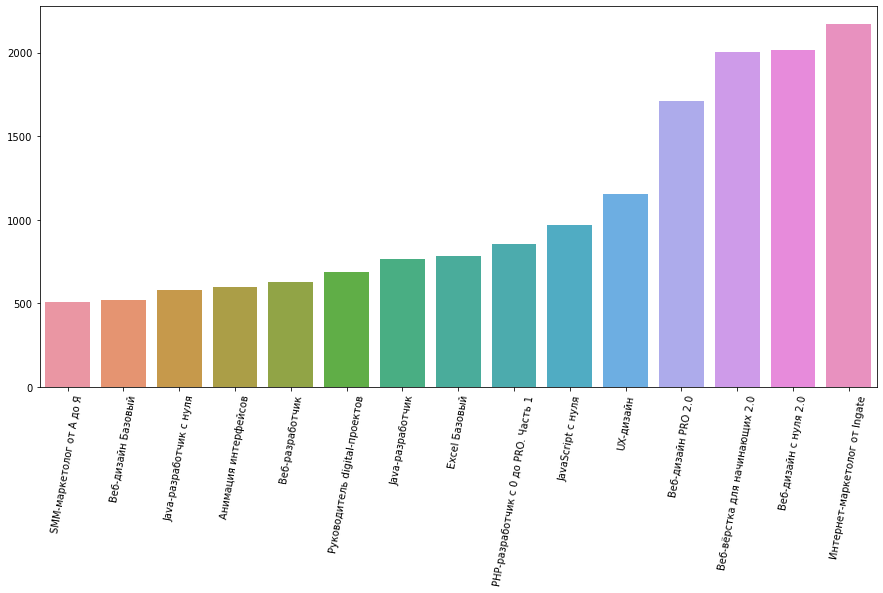

In [29]:
# строим простой график
plt.figure(figsize=(15,7))
plot = sns.barplot(x=num_of_students.index, y=num_of_students.values)
plot.tick_params(labelsize=10)
plt.xticks(rotation=80)
plot.set(xlabel=None)
plt.show()

## Задание 1.3

In [30]:
# Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, 
# отражающий количество студентов на каждом курсе. График должен иметь заголовок. 
# Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, 
# к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. 
# На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно 

In [31]:
# создаю словарь с цветами для каждой сферы
colors = {'Marketing':'royalblue', 'Design':'salmon', 'Development': 'limegreen', 'Business': 'khaki'}
colors

{'Marketing': 'royalblue',
 'Design': 'salmon',
 'Development': 'limegreen',
 'Business': 'khaki'}

In [32]:
# создаю таблицу с группировкой по курсу и сфере с общим колвом студентов по курсу
plot_students_field = main.groupby(['course_title', 'course_field'])['student_id'].nunique().sort_values()

In [33]:
# переношу столбец с названием курсов в индекс
plot_students_field = plot_students_field.reset_index().set_index('course_title')

In [34]:
plot_students_field

,course_field,student_id
course_title,,
SMM-маркетолог от А до Я,Marketing,506
Веб-дизайн Базовый,Design,518
Java-разработчик c нуля,Development,581
Анимация интерфейсов,Design,598
Веб-разработчик,Development,628
Руководитель digital-проектов,Business,685
Java-разработчик,Development,763
Excel Базовый,Business,782
PHP-разработчик с 0 до PRO. Часть 1,Development,854


In [35]:
# добавляю новый столбец с соответствием сферы и цвета
plot_students_field['colors'] = plot_students_field['course_field'].map(colors)

In [36]:
plot_students_field.head()

,course_field,student_id,colors
course_title,,,
SMM-маркетолог от А до Я,Marketing,506,royalblue
Веб-дизайн Базовый,Design,518,salmon
Java-разработчик c нуля,Development,581,limegreen
Анимация интерфейсов,Design,598,salmon
Веб-разработчик,Development,628,limegreen


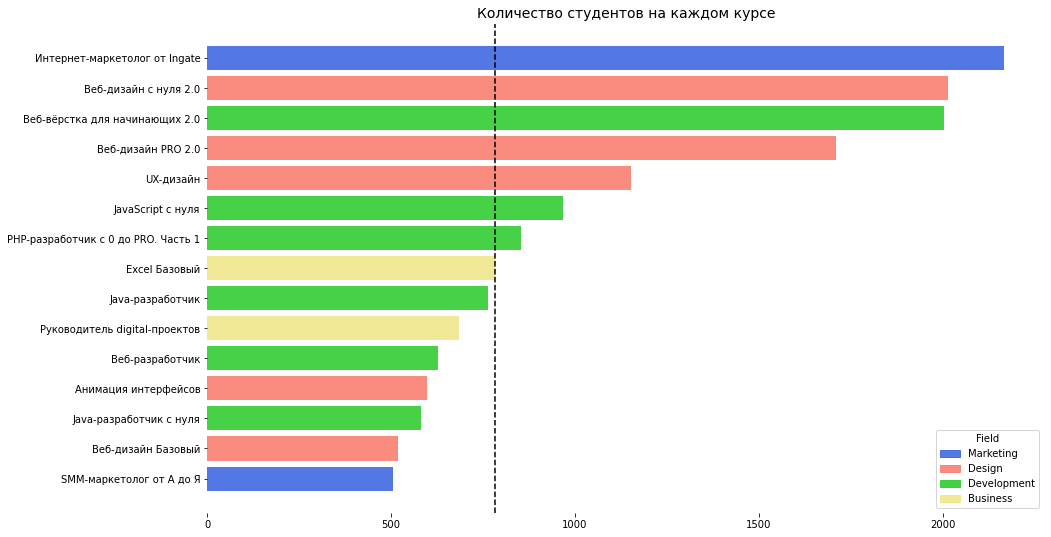

Медианное количество студентов на курсах: 782


In [37]:
# график общего количества студентов на курсах

# размер графика и название заголовка
plt.figure(figsize=(15,9))
plt.title("Количество студентов на каждом курсе", fontsize=14)

# построение самого график
ax = plt.barh(plot_students_field.index, plot_students_field.student_id, \
              color=plot_students_field.colors, alpha=0.9)

# создание меток для легенды из названия областей
labels = list(colors.keys())

# сопоставление названия области и цвета
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha=0.9) for label in labels]

# легенда
plt.legend(handles, labels,  title='Field',)

# убираем рамки у графика
plt.box(on=None)

# вычисляем медиану общего количества студентов
median_students = int(plot_students_field.student_id.median())
median_line = plt.axvline(median_students, color='k', linestyle='--', label='median')


plt.show()
print(f'Медианное количество студентов на курсах: {median_students}')

## Задание 1.4

*На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)*

Проведя аналитику, мы получили, что всего у нас 15 курсов.

Меньше всего модулей на курсах: "PHP-разработчик с 0 до PRO. Часть 1"(8), "Веб-вёрстка для начинающих 2.0"(8) и "Excel Базовый"(9).           
Наибольшее число модулей на курсах: "Анимация интерфейсов"(21), "Веб-разработчик"(20) и "UX-дизайн"(20)

Меньше всего уроков в среднем по модулям на курсах: "Веб-разработчик"(2), "Анимация интерфейсов"(3) и "Веб-дизайн Базовый"(3).    
Больше всего уроков в курсах: "Java-разработчик c нуля"(10), "Веб-вёрстка для начинающих 2.0"(7), "JavaScript с нуля"(7) и "Java-разработчик"(7)

Исходя из данных по возрасту, можно сказать, что в основном на платформе Skillbox обучаются молодые люди около 30-ти лет. На всех курсах примерно одинаковый разброс по возрасту: есть как и те, кому исполнилось 18 лет, так и те, кому за 60 и более. Только на курсе "Руководитель digital-проектов" оклонение минимально: диапозон от 21 до 48 лет.

Основываясь на данных графика, можно сделать вывод, что наибольшее количество студентов учатся на курсах в области дизайна, а именно "Веб-дизайн с нуля 2.0"(2014 студентов), "Веб-дизайн PRO 2.0"(1711 студентов) и "UX-дизайн"(1151 студентов). Также в лидерах курс по маркетингу "Интернет-маркетолог от Ingate"(2168 студентов) и курс по разработке "Веб-вёрстка для начинающих 2.0"(2004 студентов).         
Курсов с наименьшим количеством студентов, это "SMM-маркетолог от А до Я"(506 студентов), "Веб-дизайн Базовый"(518 студентов), "Java-разработчик c нуля"(581 студентов), "Анимация интерфейсов"(598 студентов) и "Веб-разработчик"(628 студентов).

## 2. Расчет потенциальной нагрузки на преподавателей

1.  Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2.  На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3.  На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно 
4.  Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5.  Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6.  Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно 
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

## Задание 2.1

In [38]:
# Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю 
# (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). 
# Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

In [39]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   progress_id    350677 non-null  object
 1   module_number  350677 non-null  int64 
 2   lesson_number  350677 non-null  int64 
 3   status         350677 non-null  object
 4   start_date     350677 non-null  object
 5   finish_date    334508 non-null  object
 6   student_id     350677 non-null  object
 7   course_id      350677 non-null  object
 8   course_title   350677 non-null  object
 9   course_field   350677 non-null  object
 10  module_title   350677 non-null  object
 11  lesson_title   350677 non-null  object
 12  lesson_token   350677 non-null  object
 13  is_video       350677 non-null  bool  
 14  is_homework    350677 non-null  bool  
dtypes: bool(2), int64(2), object(11)
memory usage: 38.1+ MB


In [40]:
# переводим значения столбца start_date в datetime.date останется только дата 
main['start_date'] = pd.to_datetime(main['start_date']).dt.date
# возращаем обратно в формат datetime
main['start_date'] = pd.to_datetime(main['start_date'])

# повторяем тоже самое для finish_date
main['finish_date'] = pd.to_datetime(main['finish_date']).dt.date
main['finish_date'] = pd.to_datetime(main['finish_date'])

In [41]:
# фильтруем датасет. оставляем только те строки, где есть домашка и первый модуль курса
# для курса Веб-дизайн Базовый первая домашка в 3 модуле
df_growth = main[(main['is_homework']) & (main['module_number'] == 1) \
                    | ((main['module_number'] == 3) & (main['course_title'] == 'Веб-дизайн Базовый'))]

In [42]:
# переносим название колонок start_date в индекс для формирования таблицы через resample
df_growth.index = df_growth.start_date

In [43]:
# группировка по названию курса и месяцам. проверяем по колву уникальных студентов.
df_growth_unstack = df_growth.groupby('course_title').resample('M').student_id.nunique() \
                            .unstack(0).fillna(0).astype('int')
# в названии дат оставляем только год и месяц
df_growth_unstack.index = pd.to_datetime(df_growth_unstack.index).strftime('%Y-%m')
df_growth_unstack.head(10)

course_title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
start_date,,,,,,,,,,,,,,,
2016-03,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2016-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-11,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0


## Задание 2.2

In [44]:
# На основании первого пункта построить line-graph с приростом студентов 
# в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, 
# оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

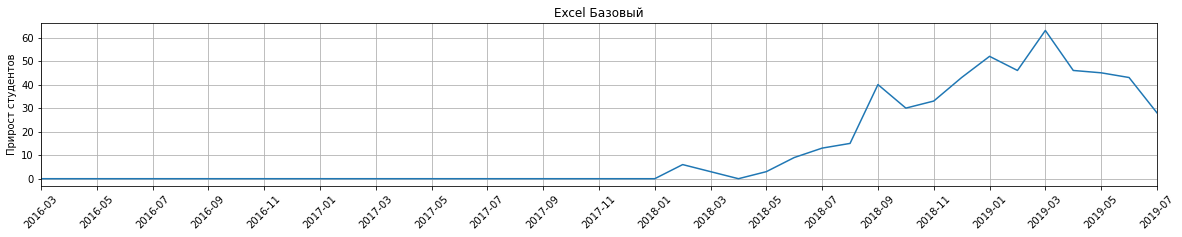

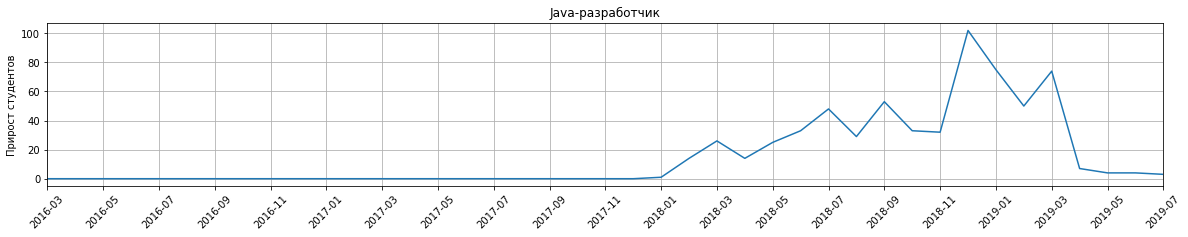

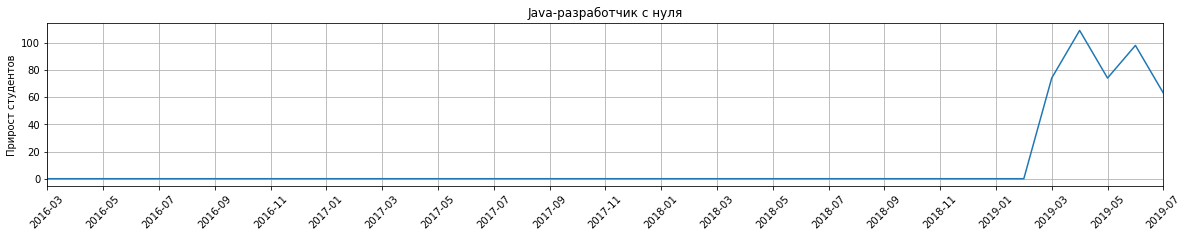

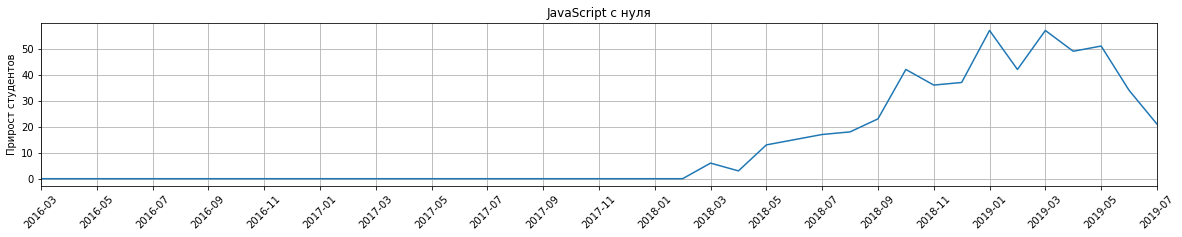

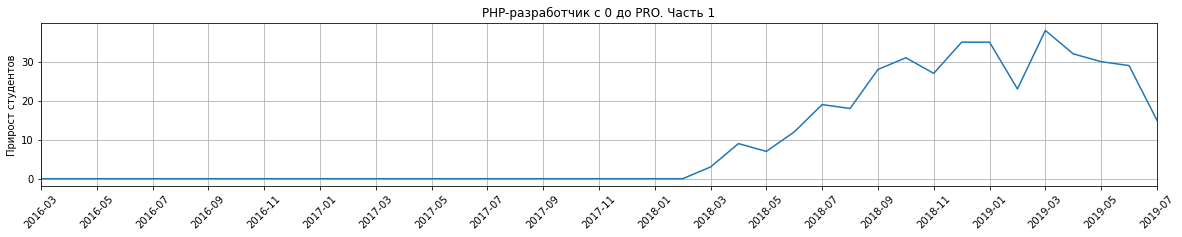

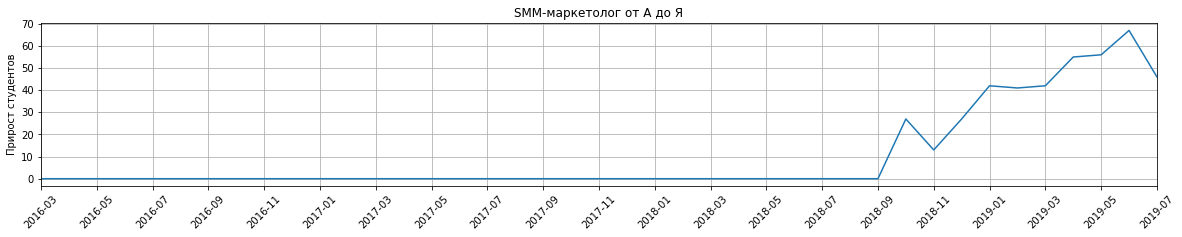

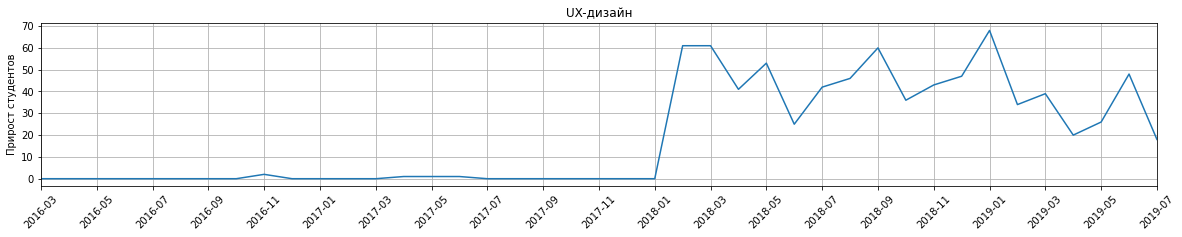

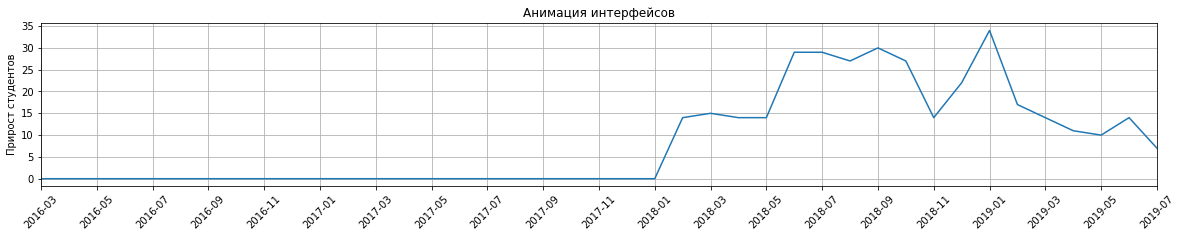

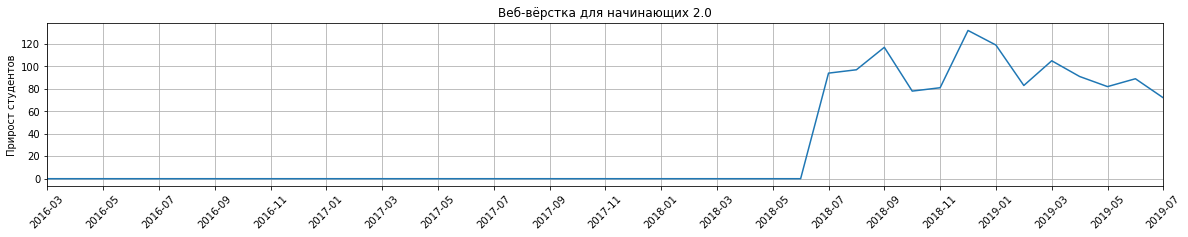

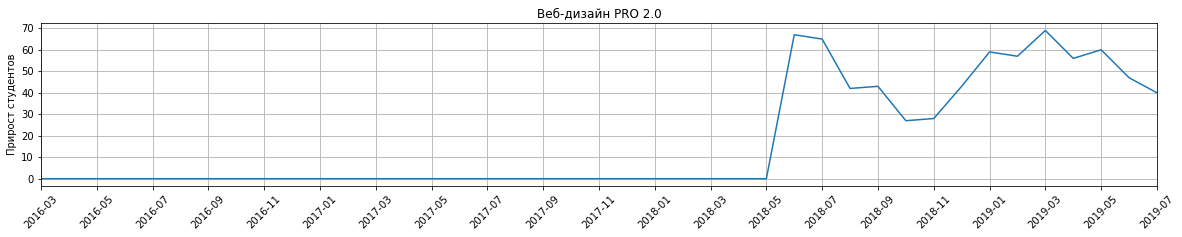

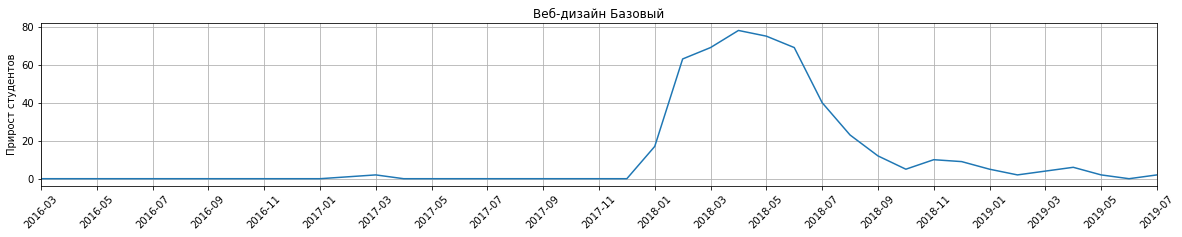

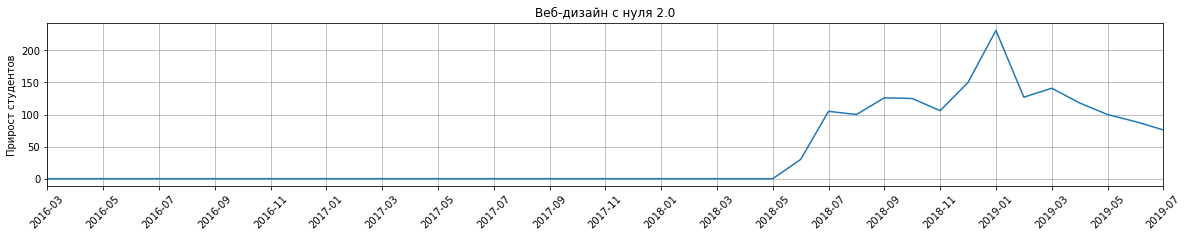

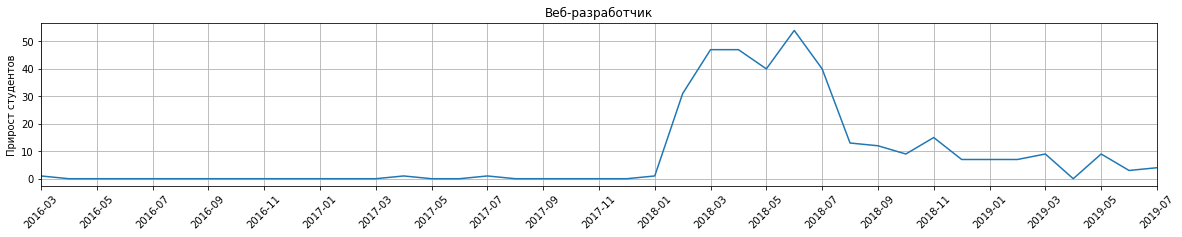

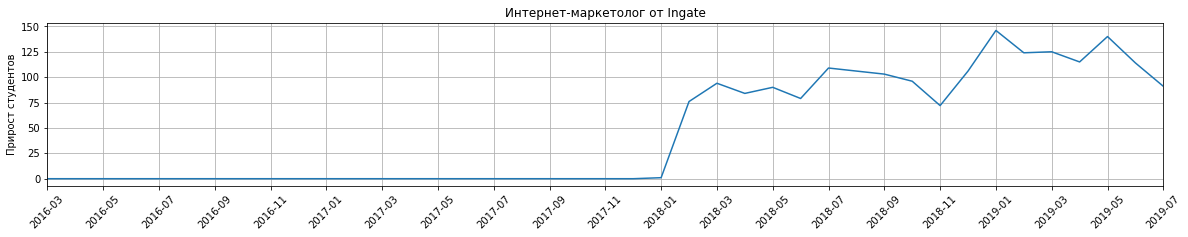

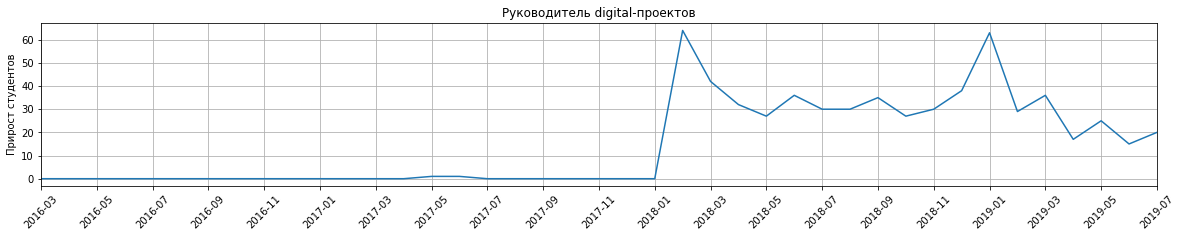

In [45]:
# формирование графиков

# сохраняем в переменную months название всех месяцев
months = df_growth_unstack.index

# по очереди строим каждый график
for i in range(15):
    # задаем размер
    plt.figure(figsize=(20, 3))
    # сохраняем строку с колвом студентов по курсу в переменную
    values_students = df_growth_unstack.iloc[:, i].values
    # сохраняем название курса в переменную
    course = df_growth_unstack.columns[i]
    # строим график
    plt.plot(months, values_students, label=course)
    # название оси y
    plt.ylabel('Прирост студентов')
    # задаем размерность оси x. название месяцев чередуется через один, чтобы не накладывались друг на друга
    plt.xticks(months[::2], rotation=45)
    # название графика
    plt.title(course)
    # задаем горизонтальные границы графика, что график начинался сразу
    plt.xlim('2016-03', '2019-07') 
    # сетка
    plt.grid()
    plt.show()


## Задание 2.3

In [46]:
# На основании первого пункта построить line-graph с несколькими линиями, 
# отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. 
# Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. 
# Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). 
# Рамок у графика быть не должно

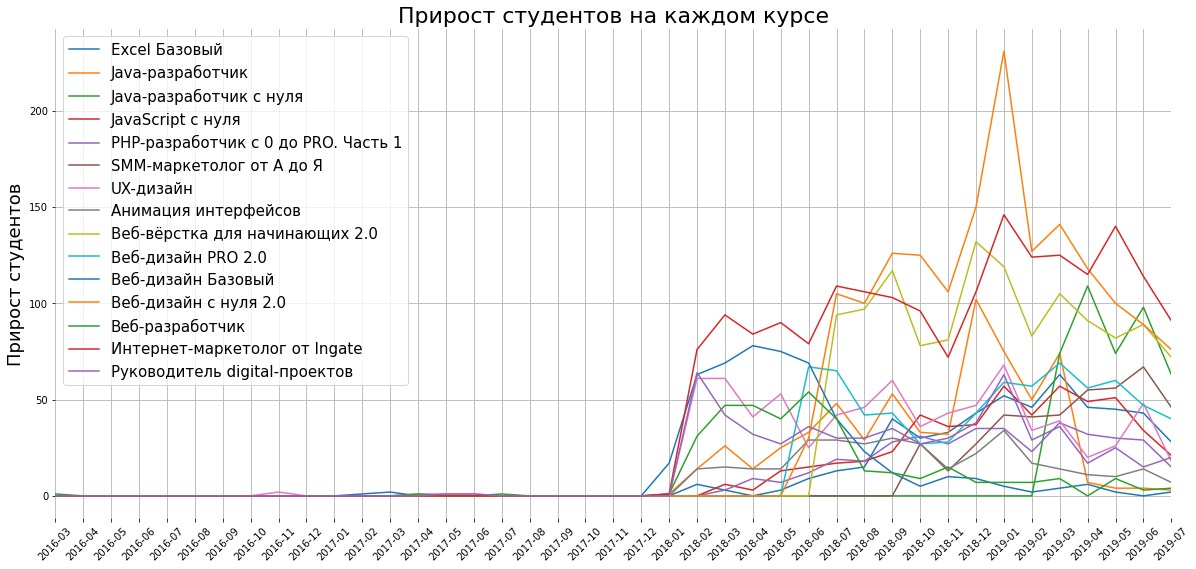

In [47]:
# сохраняем название месяцев в переменную
months = df_growth_unstack.index
# размер графика
plt.figure(figsize=(20, 9))
# построение графика
plt.plot(months, df_growth_unstack.iloc[:].values)
# название графика
plt.title('Прирост студентов на каждом курсе', fontsize=22)
# название оси y
plt.ylabel('Прирост студентов', fontsize=18)
# задаем боковые лимиты, чтобы у графика не было пропусков
plt.xlim('2016-03', '2019-07')
# поворот xtick
plt.xticks(rotation=45)
# сетка
plt.grid()
# убираем рамки у графика
plt.box(on=None)
plt.legend(df_growth_unstack.columns, prop={'size': 15})
plt.show();

## Задание 2.4

In [48]:
# Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце 
# за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. 
# Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой 
# (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [49]:
# формируем новый датасет c нужными колонками и где есть домашка
df_month_progress = main[main['is_homework']][['start_date', 'finish_date', 'course_title', 'progress_id']]
df_month_progress.head()

,start_date,finish_date,course_title,progress_id
4,2018-06-21,2018-06-28,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce
7,2018-06-23,NaT,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce
12,2018-03-11,NaT,Интернет-маркетолог от Ingate,a97393fe164b448e7231c07d48c82f9e
17,2018-02-19,2018-02-20,Интернет-маркетолог от Ingate,a97393fe164b448e7231c07d48c82f9e
29,2018-10-02,2018-10-05,Веб-дизайн с нуля 2.0,000962791295398b5ec7bc24f05269ac


In [50]:
df_month_progress.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54478 entries, 4 to 350667
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   start_date    54478 non-null  datetime64[ns]
 1   finish_date   44925 non-null  datetime64[ns]
 2   course_title  54478 non-null  object        
 3   progress_id   54478 non-null  object        
dtypes: datetime64[ns](2), object(2)
memory usage: 2.1+ MB


In [51]:
# переводим колонки finish_date и start_date в datetime формат и выставляем первый день в датах
# чтобы точнее считать продолжительность в полных днях
df_month_progress['finish_date'] = pd.to_datetime(df_month_progress['finish_date']).dt.date
df_month_progress['finish_date'] = pd.to_datetime(df_month_progress['finish_date'])
df_month_progress['finish_date'] = df_month_progress['finish_date'].apply(lambda dt: dt.replace(day=1))

df_month_progress['start_date'] = pd.to_datetime(df_month_progress['start_date']).dt.date
df_month_progress['start_date'] = pd.to_datetime(df_month_progress['start_date'])
df_month_progress['start_date'] = df_month_progress['start_date'].apply(lambda dt: dt.replace(day=1))

In [52]:
# так как у некоторых студентов нет даты окончания домашки, будет считать, что они ее
# еще делают и будем учитывать их в прогрессе. Для этого в колонке finish_date
# поставим крайнюю дату анализа. это 2019-07-01
df_month_progress['finish_date'] = df_month_progress['finish_date'].fillna(df_month_progress['finish_date'].max())
df_month_progress.head()

,start_date,finish_date,course_title,progress_id
4,2018-06-01,2018-06-01,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce
7,2018-06-01,2019-07-01,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce
12,2018-03-01,2019-07-01,Интернет-маркетолог от Ingate,a97393fe164b448e7231c07d48c82f9e
17,2018-02-01,2018-02-01,Интернет-маркетолог от Ingate,a97393fe164b448e7231c07d48c82f9e
29,2018-10-01,2018-10-01,Веб-дизайн с нуля 2.0,000962791295398b5ec7bc24f05269ac


In [53]:
# считаем разницу в днях между началом и сдачей домашки. Затем переведем полученное значение в колво месяцев,
# округлим и добавим единицу, т.к. не учитывался первый месяц начала домашки
df_month_progress['duration'] = ((df_month_progress['finish_date'] - df_month_progress['start_date']) / \
                                 np.timedelta64(1, 'M')).apply(np.round) + 1

In [54]:
# получаем список месяцев между датами начала и конца домашки. от начала домашки посчитаем колво
# месяцев, равное продолжительности домашки
df_month_progress['month_range'] = df_month_progress.apply(lambda x: pd.date_range(x['start_date'], \
                                                                             periods=x['duration'], \
                                                                             freq="M"), axis=1)

In [55]:
# разворачиваем списки с месяцами по всей колонке
df_month_progress = df_month_progress.explode('month_range')

In [56]:
# оставляем в колонке month_range только год и месяц для удобства
df_month_progress['month_range'] = df_month_progress['month_range'].dt.strftime('%Y-%m')
df_month_progress.head()

,start_date,finish_date,course_title,progress_id,duration,month_range
4,2018-06-01,2018-06-01,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce,1.0,2018-06
7,2018-06-01,2019-07-01,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce,14.0,2018-06
7,2018-06-01,2019-07-01,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce,14.0,2018-07
7,2018-06-01,2019-07-01,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce,14.0,2018-08
7,2018-06-01,2019-07-01,Веб-дизайн PRO 2.0,a387ab916f402cb3fbfffd29f68fd0ce,14.0,2018-09


In [57]:
# формуруем таблицу
df_progress_pivot = df_month_progress.pivot_table('progress_id', index='month_range', \
                                            columns='course_title', dropna=False, \
                                            aggfunc='count', fill_value=0)
df_progress_pivot.head(30)

course_title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
month_range,,,,,,,,,,,,,,,
2016-03,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
2016-11,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
2016-12,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2017-01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2017-02,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2017-03,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0
2017-04,0,0,0,0,0,0,2,0,0,0,4,0,1,0,0
2017-05,0,0,0,0,0,0,3,0,0,0,2,0,2,0,1
2017-06,0,0,0,0,0,0,6,0,0,0,1,0,2,0,2


## Задание 2.5

In [58]:
# Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, 
# оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы

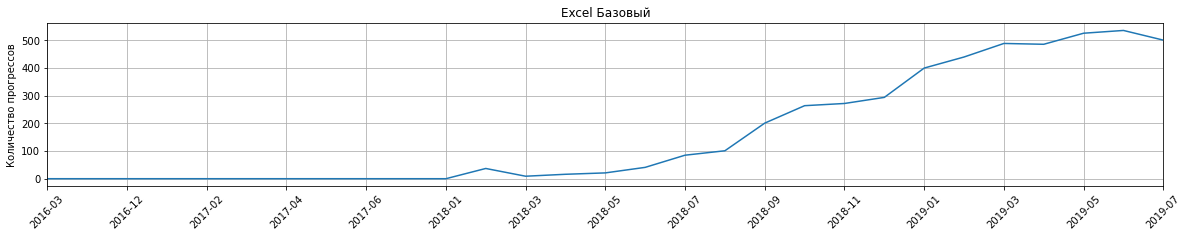

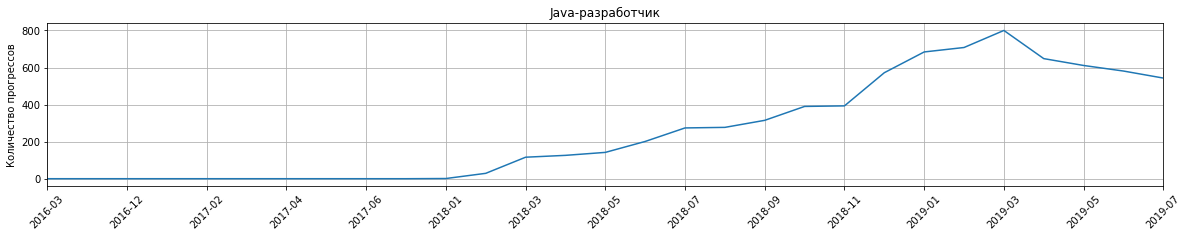

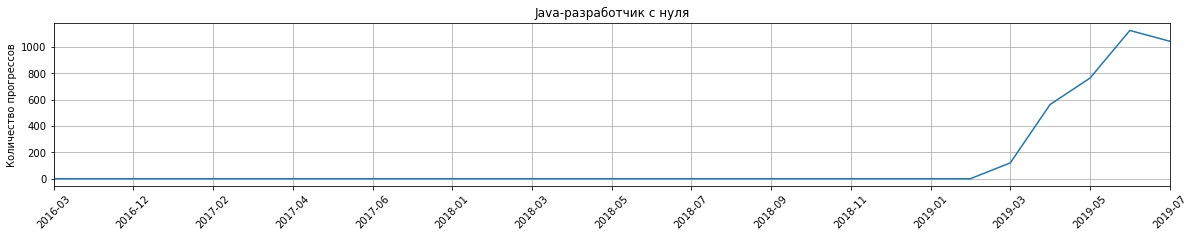

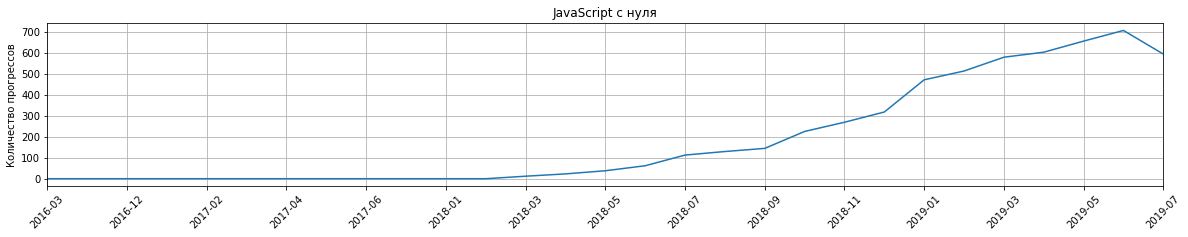

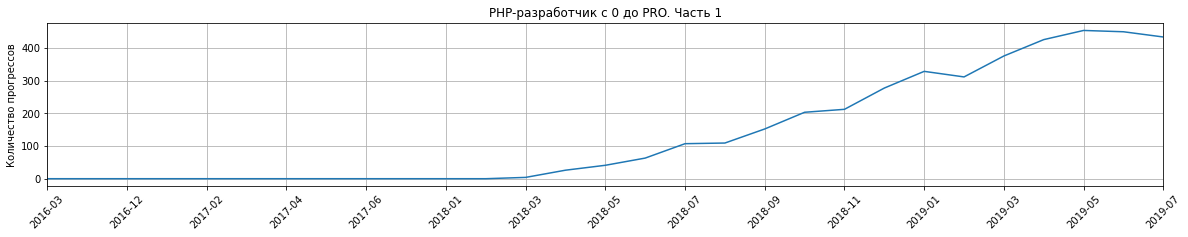

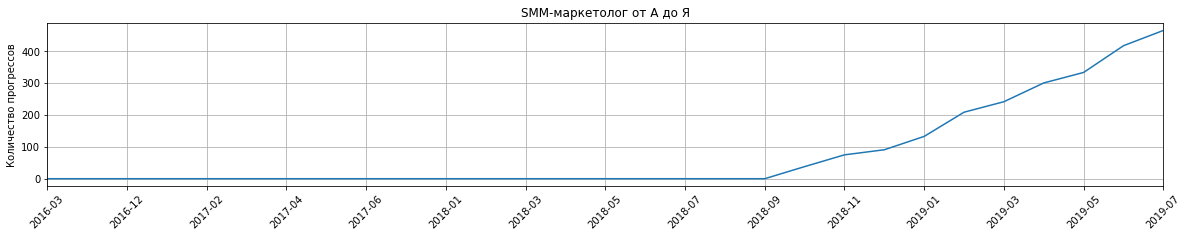

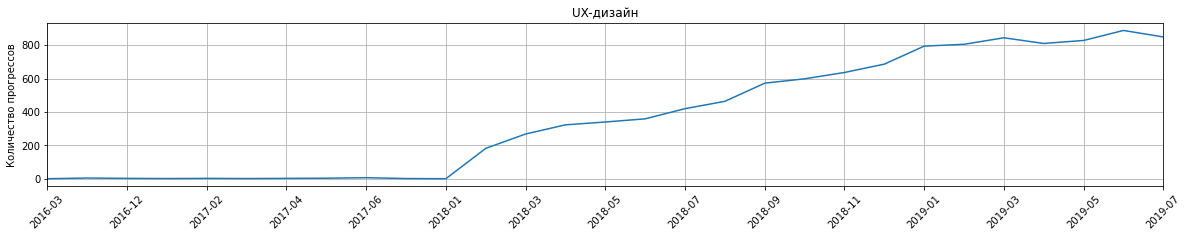

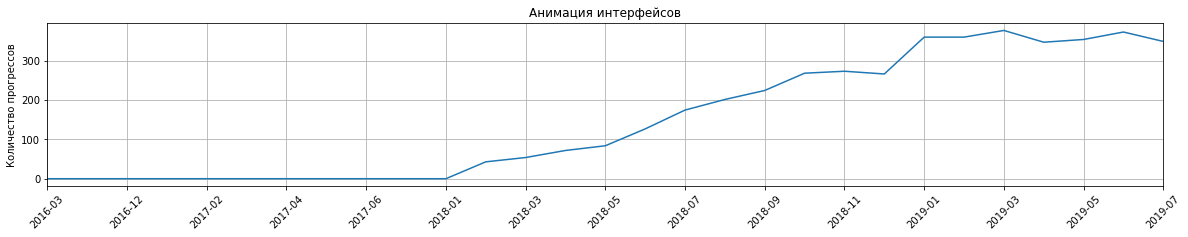

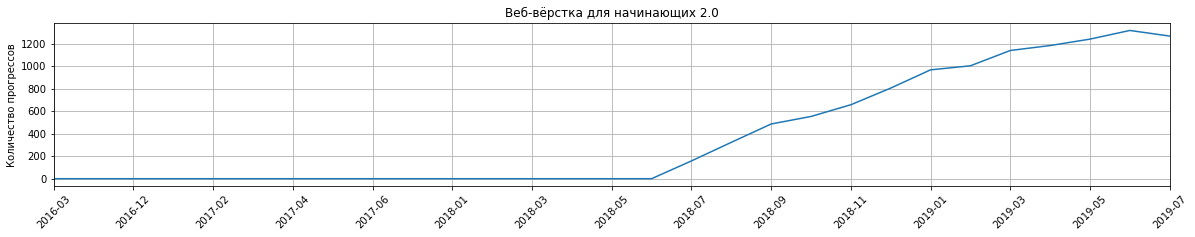

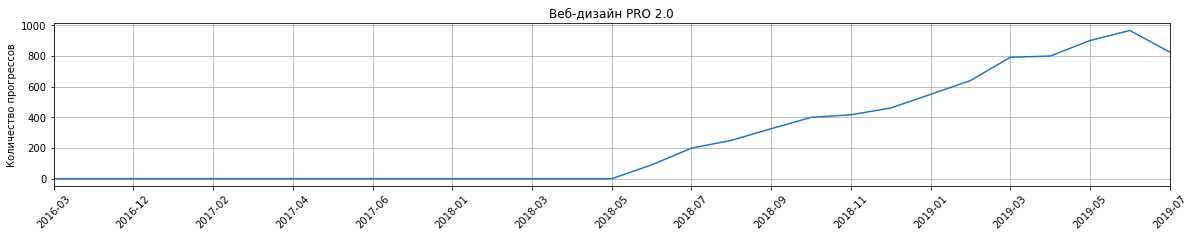

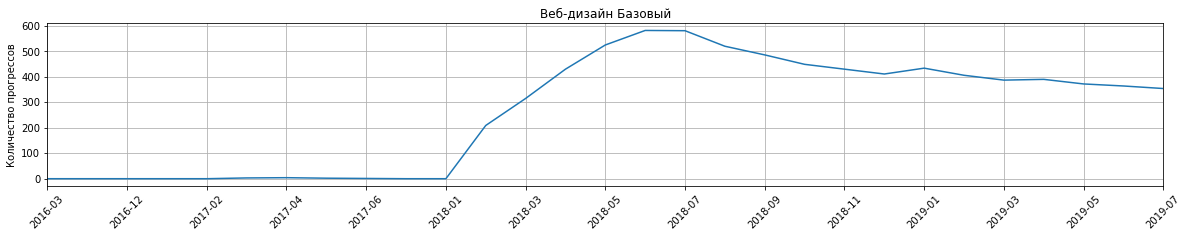

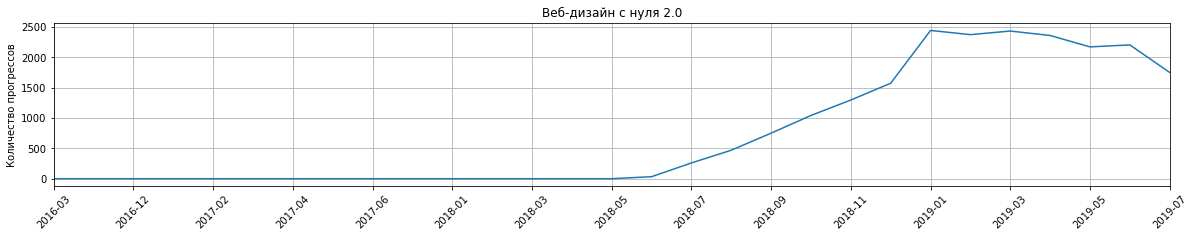

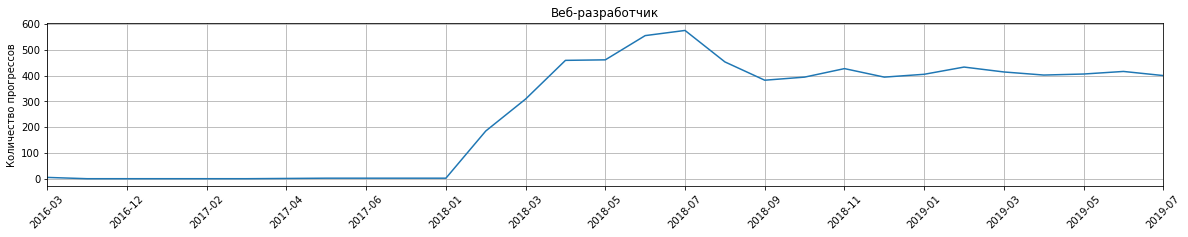

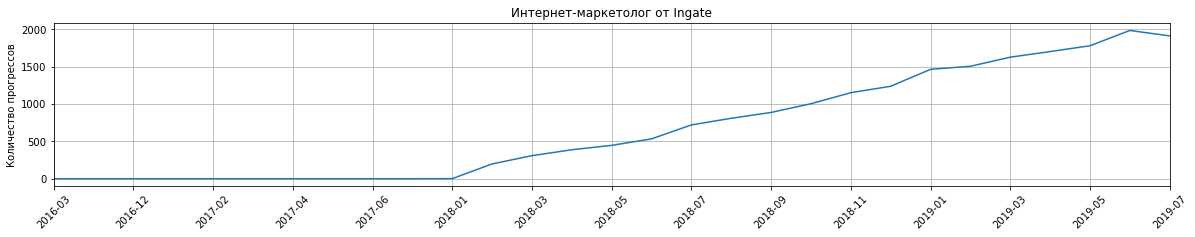

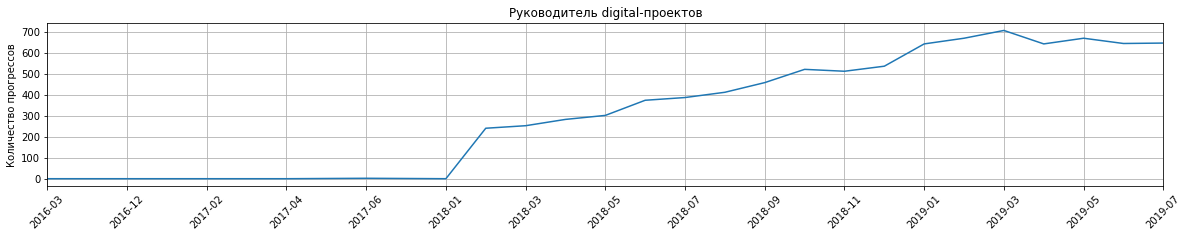

In [59]:
# формирование графиков

# сохраняем в переменную months название всех месяцев
months = df_progress_pivot.index

# по очереди строим каждый график
for i in range(15):
    # задаем размер
    plt.figure(figsize=(20, 3))
    # сохраняем строку с прогрессами домашек по курсу в переменную
    progresses_hm = df_progress_pivot.iloc[:, i].values
    # сохраняем название курса в переменную
    course = df_progress_pivot.columns[i]
    # строим график
    plt.plot(months, progresses_hm, label=course)
    # название оси y
    plt.ylabel('Количество прогрессов')
    # задаем размерность оси x. название месяцев чередуется через один, чтобы не накладывались друг на друга
    plt.xticks(months[::2], rotation=45)
    # название графика
    plt.title(course)
    # задаем горизонтальные границы графика, что график начинался сразу
    plt.xlim('2016-03', '2019-07') 
    # сетка
    plt.grid()
    plt.show()

## Задание 2.6

In [60]:
# Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. 
# Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. 
# Ось, отражающая количество прогрессов, должна быть подписана. 
# Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно 

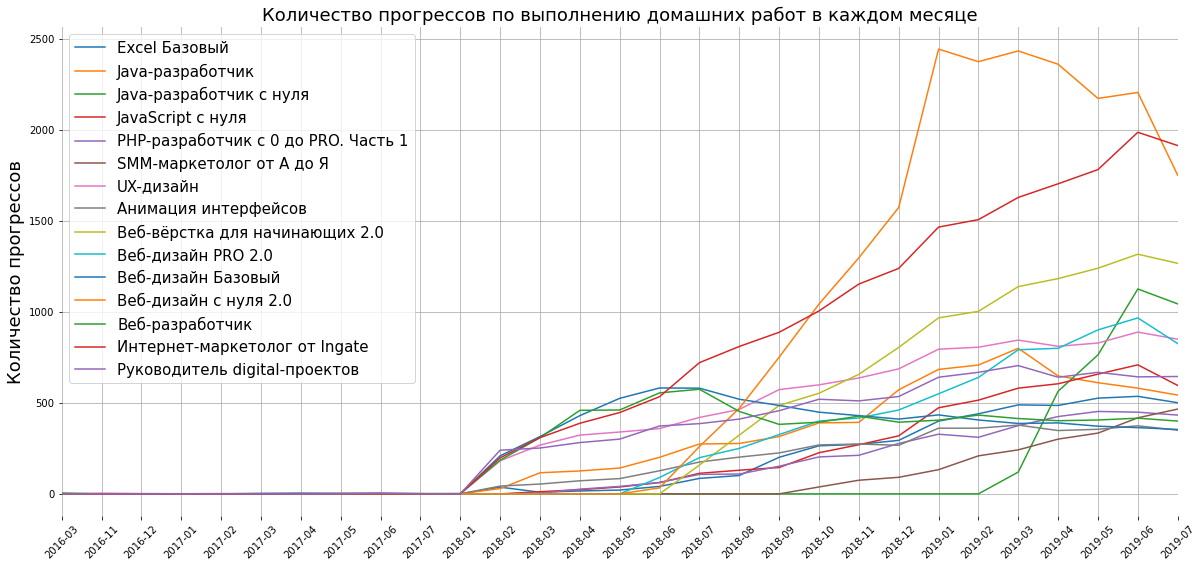

In [61]:
# сохраняем название месяцев в переменную
months = df_progress_pivot.index
# размер графика
plt.figure(figsize=(20, 9))
# построение графика
plt.plot(months, df_progress_pivot.iloc[:].values)
# название графика
plt.title('Количество прогрессов по выполнению домашних работ в каждом месяце', fontsize=18)
# название оси y
plt.ylabel('Количество прогрессов', fontsize=18)
# задаем боковые лимиты, чтобы у графика не было пропусков
plt.xlim('2016-03', '2019-07')
# поворот xtick
plt.xticks(rotation=45)
# сетка
plt.grid()
# убираем рамки у графика
plt.box(on=None)
plt.legend(df_progress_pivot.columns, prop={'size': 15})
plt.show();

## Задание 2.7

In [62]:
# На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

Проведя аналитику и взглянув на графики, мы можем сделать следующие первоначальны выводы:

Мы можем предположить, что большинство курсов были открыты в начале 2018 года.

В основном динамика прироста студентво по многим курсам стабильна и варьируется не сильно в зависимости от времени, но у некоторых она отличается. Например курс **Java-разработчик** был очень популярен в конце 2018 года, но затем динамика прироста начала сильно падать и близка к нулю в конце исследования. Можно предположить, что это связано с тем, что в начале 2019 года появился новый курс **Java-разработчик c нуля**, и большинство новых студентов предпочли его.

Похожая ситуация у курсов **Веб-дизайн Базовый**  и **Веб-разработчик** - пик популярности в середине 2018 года и снижение прироста практически до нуля. И появление таких курсов как **Веб-дизайн PRO 2.0**, **Веб-дизайн с нуля 2.0** и  **Веб-вёрстка для начинающих 2.0**, которые с самого начала показывают хорошую динамику роста.

Можем сделать, что студентов больше привлекают курсы, для которых не нужна базовая подготовка, то есть с нуля.
Также у многих курсов наблюдается высоких прирост студентов в начале 2019 года. Возможно для многих новый год, это повод научиться чему-то новому, либо привлекают выгодные цены на курсы в предверии праздников.


На основании данных, полученных при подсчете количества прогрессов по домашним работам, можно уверенно сказать, что с течением времени количество прогрессов постоянно увеличивается(а значит и нагрузка на преподавателей). Наибольшую нагрузку мы наблюдаем на курсах: **Интернет-маркетолог от Ingate(достигает 1400 прогрессов)**, **Веб-дизайн с нуля 2.0(достигает 1200 прогрессов)** и **Веб-вёрстка для начинающих 2.0(1000 прогрессов)**.

На курсах **Java-разработчик**, **Веб-дизайн Базовый** и **Веб-разработчик** рост прогрессов замедляется и даже уменьшается.

## 3. Выявление проблемных модулей

1.  Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2.  На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3.   Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4.  На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно 
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

## Задание 3.1

In [63]:
# Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля 
# (разность между временем начала и окончания выполнения домашней работы) для каждого курса. 
# Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения 
# первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [64]:
# фильтруем данные только где есть выполненные домашки и сохраняем в новый датасет
df_modules = main[(main['is_homework']) & (main['status'] == 'done')]
df_modules.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21,2018-06-28,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
17,a97393fe164b448e7231c07d48c82f9e,1,7,done,2018-02-19,2018-02-20,f69e2707b7ba94d49ca03ea9ed52ea5d,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,"Введение в интернет-маркетинг: цели, инструмен...",Домашняя работа,148dd02b-c203-4d35-a8a5-daf33fc02a82,False,True
29,000962791295398b5ec7bc24f05269ac,7,5,done,2018-10-02,2018-10-05,fcd7b6853c2582372980dd6af56d3bdc,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Основы работы с графикой,Домашняя работа,e362bb6e-4ab4-4533-985e-d728300e4c32,False,True
37,000962791295398b5ec7bc24f05269ac,13,6,done,2019-01-14,2019-01-23,fcd7b6853c2582372980dd6af56d3bdc,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Адаптивность и мобильная версия,Домашняя работа,5067799f-27a8-40bf-8a30-1290ebdfd681,False,True
38,000962791295398b5ec7bc24f05269ac,12,5,done,2018-10-09,2019-01-17,fcd7b6853c2582372980dd6af56d3bdc,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,Формы и кнопки,Домашняя работа,673e5dce-28a2-4a7d-99f8-e0e525caf8f9,False,True


In [65]:
# группируем данные. оставляем только минимальную дату по start_date и максимальную по finish_date
df_grouped_modules = df_modules.groupby(['course_title', 'module_number', 'module_title', 'student_id']) \
                        .agg({'start_date':'min', 'finish_date':'max'})
df_grouped_modules

start_date  \
course_title                  module_number module_title                                       student_id                                    
Excel Базовый                 1             Основной функционал Excel                          001b192f899a84496be98b41906246fc 2019-03-29   
                                                                                               006f0189ec657741ee4d53474c7a258d 2019-01-25   
                                                                                               0074621b6955733338ab0feb2a9a2100 2019-04-10   
                                                                                               0098ca12f73a56dadbf6099389305d80 2019-04-03   
                                                                                               0284a9c2ee0d9c7a97e2a943b0d52b92 2018-07-07   
...                                                                                                                                    ...   
Руководитель digital-проектов 16            Контроль. Риски. Поощрения. Наказания. Обратная... e3794e7c0fcef6e0682a6914497f4bf7 2018-11-14   
                                                                                               e3cf05b76236f033304bb99fe2bb7bbd 2018-09-12   
                                                                                               e52d093cb79135e38e420734654ed571 2019-02-21   
                                                                                               e77ebf1f6c9bb45bcc6b0ad5b9c4cba8 2019-02-18   
                                                                                               e947f7450ad2364a6f5c78836a431f2b 2019-04-07   

                                                                                                                                finish_date  
course_title                  module_number module_title                                       student_id                                    
Excel Базовый                 1             Основной функционал Excel                          001b192f899a84496be98b41906246fc  2019-03-31  
                                                                                               006f0189ec657741ee4d53474c7a258d  2019-01-26  
                                                                                               0074621b6955733338ab0feb2a9a2100  2019-04-13  
                                                                                               0098ca12f73a56dadbf6099389305d80  2019-04-05  
                                                                                               0284a9c2ee0d9c7a97e2a943b0d52b92  2018-07-09  
...                                                                                                                                     ...  
Руководитель digital-проектов 16            Контроль. Риски. Поощрения. Наказания. Обратная... e3794e7c0fcef6e0682a6914497f4bf7  2018-11-19  
                                                                                               e3cf05b76236f033304bb99fe2bb7bbd  2018-10-03  
                                                                                               e52d093cb79135e38e420734654ed571  2019-03-06  
                                                                                               e77ebf1f6c9bb45bcc6b0ad5b9c4cba8  2019-02-25  
                                                                                               e947f7450ad2364a6f5c78836a431f2b  2019-04-09  

[43427 rows x 2 columns]

In [66]:
# создаем новый столбец с длительностью выполнения домашки по каждому модулю в днях
df_grouped_modules['duration'] = (df_grouped_modules['finish_date'] - df_grouped_modules['start_date']) \
                                    / np.timedelta64(1, 'D')
df_grouped_modules

start_date  \
course_title                  module_number module_title                                       student_id                                    
Excel Базовый                 1             Основной функционал Excel                          001b192f899a84496be98b41906246fc 2019-03-29   
                                                                                               006f0189ec657741ee4d53474c7a258d 2019-01-25   
                                                                                               0074621b6955733338ab0feb2a9a2100 2019-04-10   
                                                                                               0098ca12f73a56dadbf6099389305d80 2019-04-03   
                                                                                               0284a9c2ee0d9c7a97e2a943b0d52b92 2018-07-07   
...                                                                                                                                    ...   
Руководитель digital-проектов 16            Контроль. Риски. Поощрения. Наказания. Обратная... e3794e7c0fcef6e0682a6914497f4bf7 2018-11-14   
                                                                                               e3cf05b76236f033304bb99fe2bb7bbd 2018-09-12   
                                                                                               e52d093cb79135e38e420734654ed571 2019-02-21   
                                                                                               e77ebf1f6c9bb45bcc6b0ad5b9c4cba8 2019-02-18   
                                                                                               e947f7450ad2364a6f5c78836a431f2b 2019-04-07   

                                                                                                                                finish_date  \
course_title                  module_number module_title                                       student_id                                     
Excel Базовый                 1             Основной функционал Excel                          001b192f899a84496be98b41906246fc  2019-03-31   
                                                                                               006f0189ec657741ee4d53474c7a258d  2019-01-26   
                                                                                               0074621b6955733338ab0feb2a9a2100  2019-04-13   
                                                                                               0098ca12f73a56dadbf6099389305d80  2019-04-05   
                                                                                               0284a9c2ee0d9c7a97e2a943b0d52b92  2018-07-09   
...                                                                                                                                     ...   
Руководитель digital-проектов 16            Контроль. Риски. Поощрения. Наказания. Обратная... e3794e7c0fcef6e0682a6914497f4bf7  2018-11-19   
                                                                                               e3cf05b76236f033304bb99fe2bb7bbd  2018-10-03   
                                                                                               e52d093cb79135e38e420734654ed571  2019-03-06   
                                                                                               e77ebf1f6c9bb45bcc6b0ad5b9c4cba8  2019-02-25   
                                                                                               e947f7450ad2364a6f5c78836a431f2b  2019-04-09   

                                                                                                                                 duration  
course_title                  module_number module_title                                       student_id                                  
Excel Базовый                 1             Основной функционал Excel                          001b192f899a84496be98b41906246fc       2.0  
 

In [67]:
# группируем данные по course_title, module_title, module_number и агрегируем столбец duration
df_agg_modules = df_grouped_modules.groupby(by=['course_title', 'module_title', 'module_number'], sort=False) \
                                .agg(['min', 'max', 'mean', 'median'])['duration'] \
                                .astype('int').reset_index()
df_agg_modules

,course_title,module_title,module_number,min,max,mean,median
0,Excel Базовый,Основной функционал Excel,1,0,184,6,2
1,Excel Базовый,Основной функционал Excel (продолжение),2,0,185,4,2
2,Excel Базовый,Формулы и функции Excel. Введение,3,0,89,3,2
3,Excel Базовый,Формулы и функции Excel. Продолжаем работать с...,4,0,328,10,3
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,5,0,176,7,3
...,...,...,...,...,...,...,...
185,Руководитель digital-проектов,Решение факапов. Lean/TOC. Обзор.,12,0,212,21,7
186,Руководитель digital-проектов,Интеграционные проекты.,13,0,247,26,12
187,Руководитель digital-проектов,Управление дизайнерами. Разработка дизайна по ...,14,0,199,14,8
188,Руководитель digital-проектов,Основы технической грамотности,15,0,132,6,3


## Задание 3.2

In [68]:
# На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля 
# для каждого курса. 15 графиков. Графики должны иметь заголовки

In [69]:
# меняем формат у столбца module_number с int на str, для более удобного отображения на графике
df_agg_modules.module_number = df_agg_modules.module_number.astype('str')

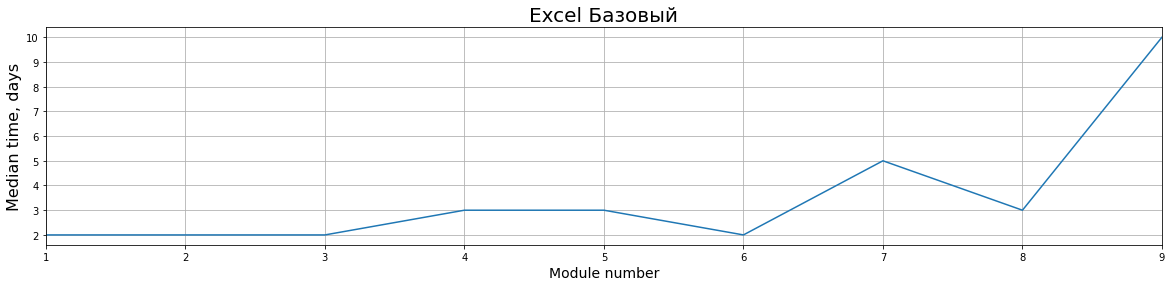

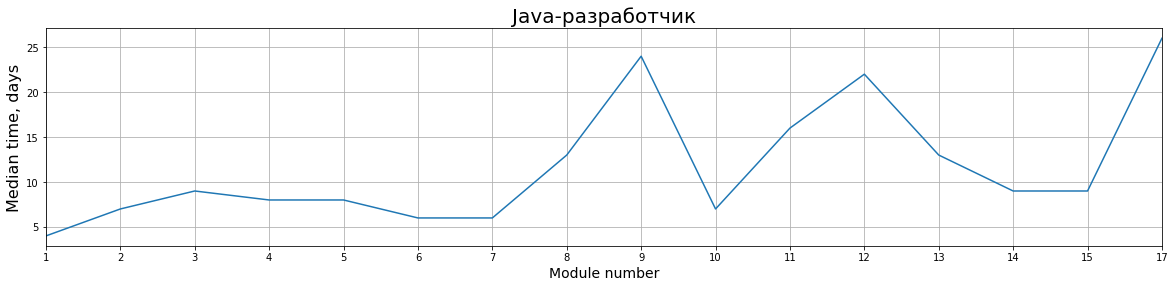

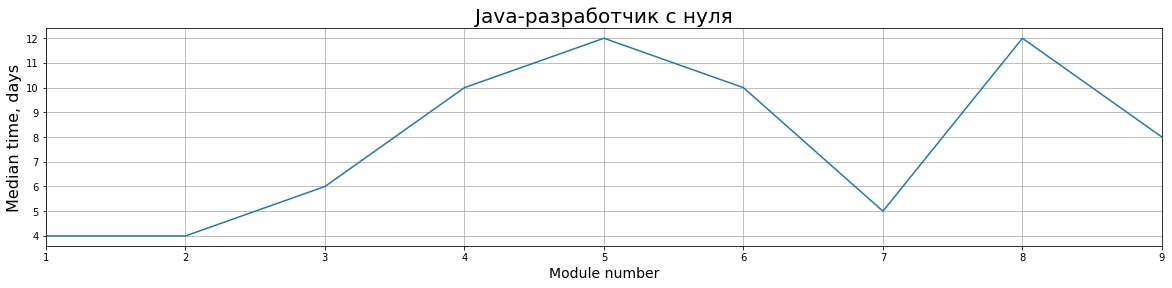

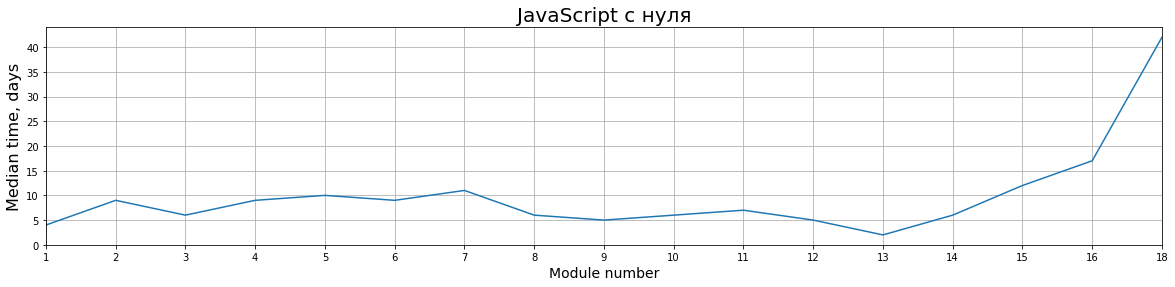

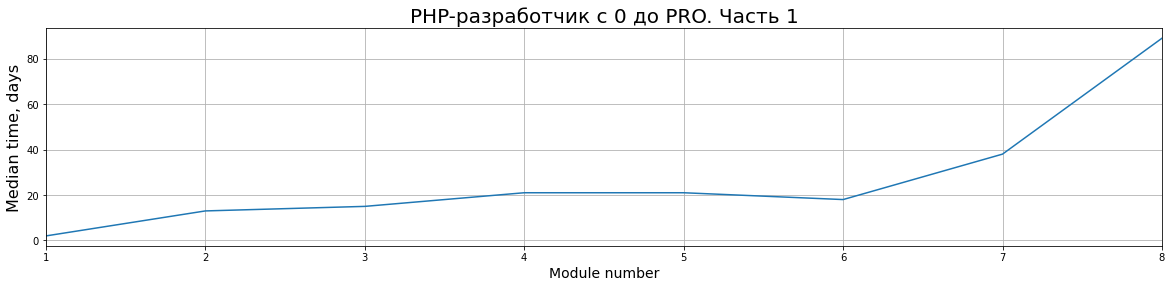

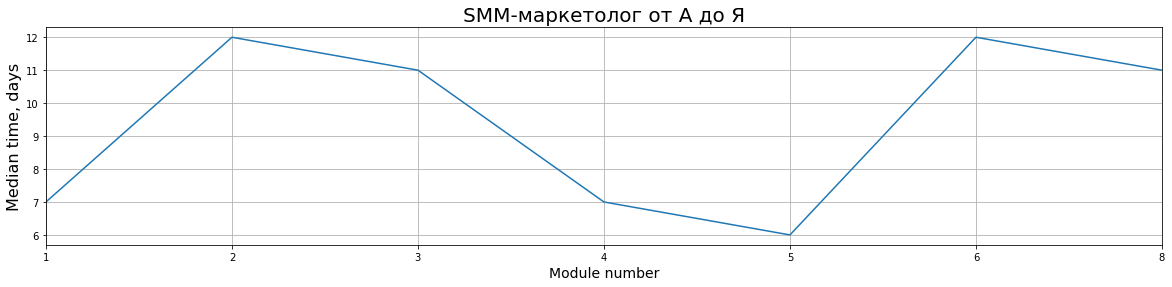

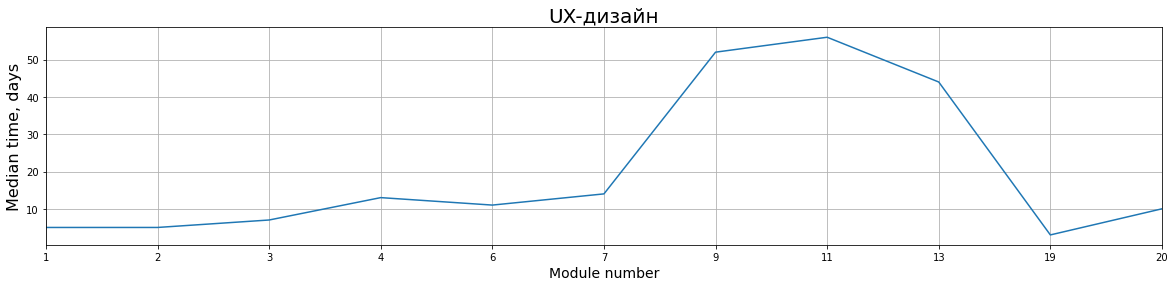

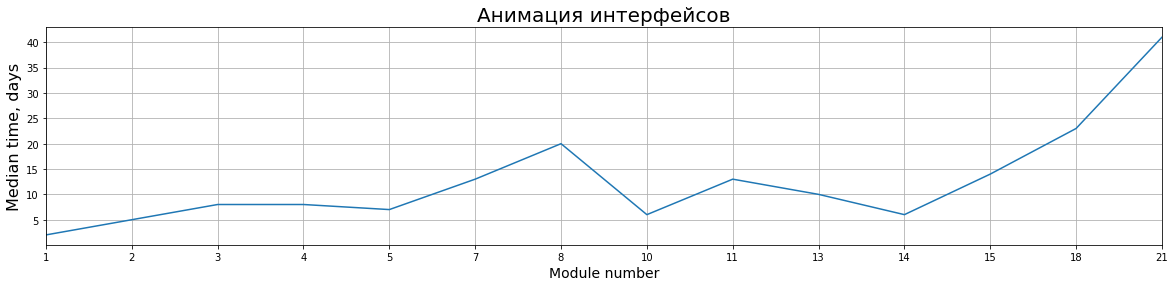

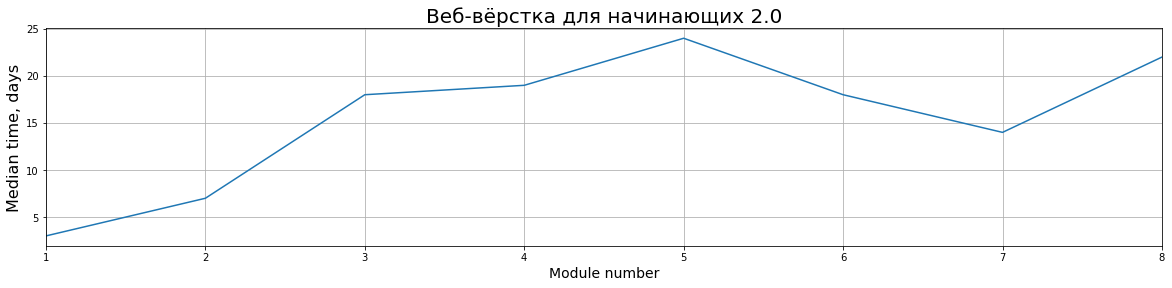

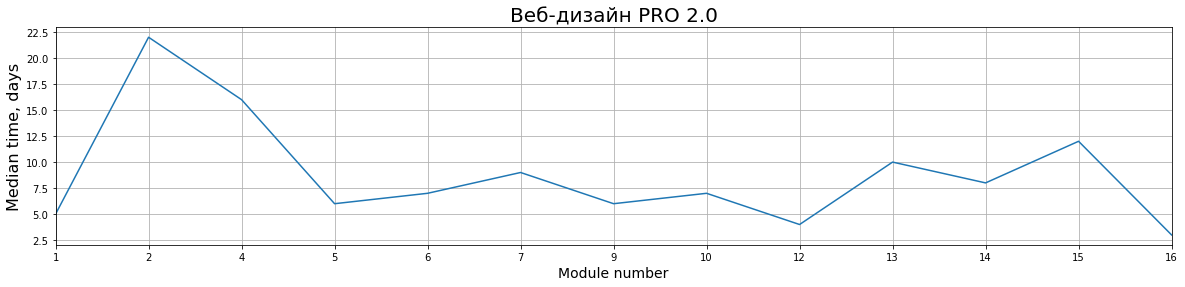

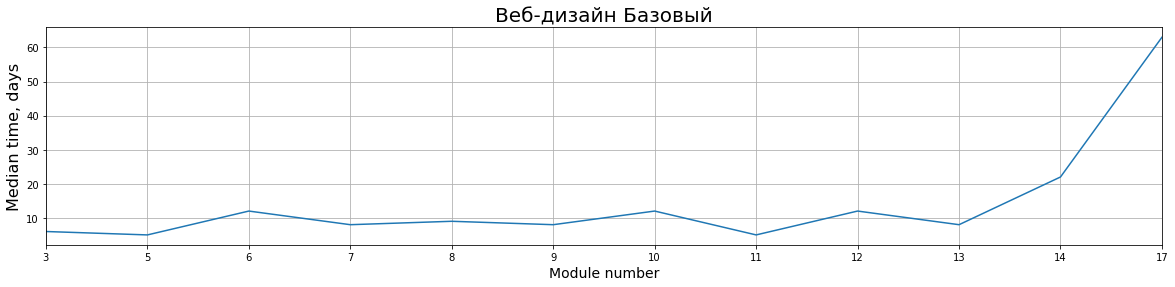

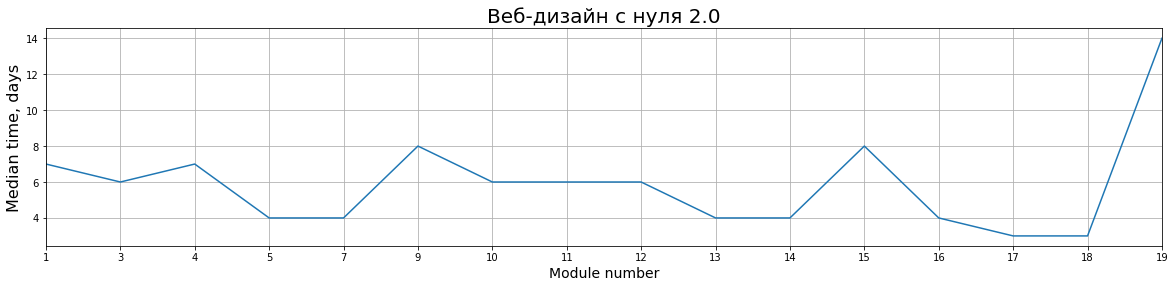

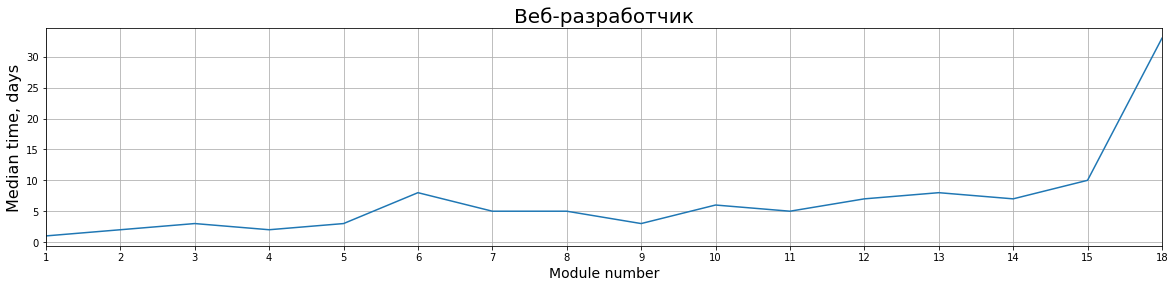

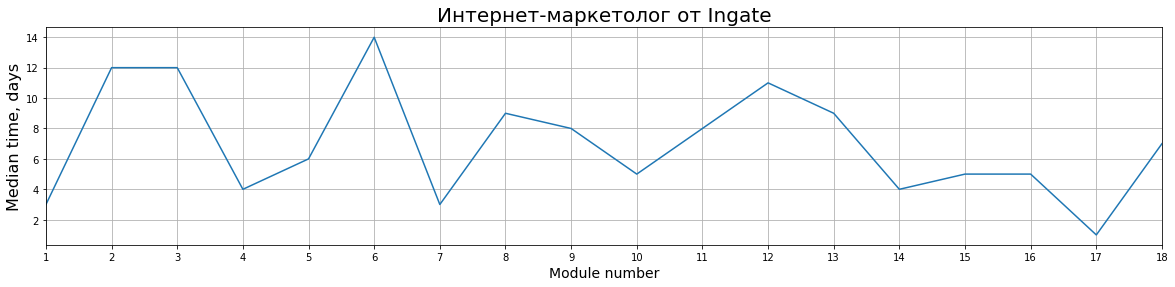

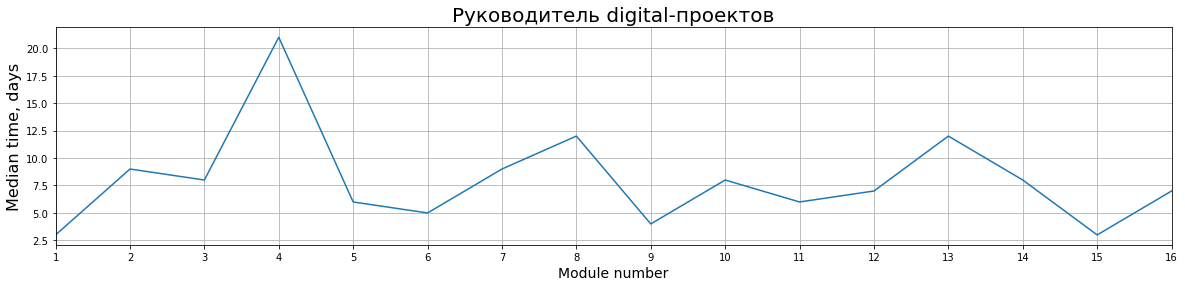

In [70]:
# формирование графиков

# сохраняем список с названиями курсов
course_list = list(df_agg_modules.course_title.unique())

# по очереди строим каждый график
for i in range(15):
    # задаем размер
    plt.figure(figsize=(20, 4))
    # сохраняем название текущего курса в переменную
    course = course_list[i]
    # сохраняем список с нумерецией модулей текущего курса
    module_numbers = df_agg_modules[df_agg_modules['course_title'] == course].module_number.values
    # сохраняем список со значениями медианны каждого модуля текущего курса
    median_values = df_agg_modules[df_agg_modules['course_title'] == course]['median'].values
    # строим график
    plt.plot(module_numbers, median_values, label=course)
    # название оси y
    plt.ylabel('Median time, days', fontsize=16)
    # название графика
    plt.title(course, fontsize=20)
    plt.xticks(module_numbers)
    plt.xlabel('Module number', fontsize=14)
    # задаем горизонтальные границы графика, чтобы график начинался сразу
    plt.xlim(module_numbers[0], module_numbers[-1]) 
    # сетка
    plt.grid()
    plt.show()

## Задание 3.3

In [71]:
# Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам 
# (12 месяцев, январь-декабрь) для каждого курса.

In [72]:
# копируем датасет из прошлого задания
df_seasons = df_grouped_modules.copy()

In [73]:
# меняем в столбце start_date значения, оставляя только численное обозначения месяца
df_seasons['start_date'] = df_grouped_modules['start_date'].dt.strftime('%m')
# переименование столбца start_date в months. сброс индексов
df_seasons = df_seasons.rename(columns={'start_date': 'months'}).reset_index()
df_seasons

,course_title,module_number,module_title,student_id,months,finish_date,duration
0,Excel Базовый,1,Основной функционал Excel,001b192f899a84496be98b41906246fc,03,2019-03-31,2.0
1,Excel Базовый,1,Основной функционал Excel,006f0189ec657741ee4d53474c7a258d,01,2019-01-26,1.0
2,Excel Базовый,1,Основной функционал Excel,0074621b6955733338ab0feb2a9a2100,04,2019-04-13,3.0
3,Excel Базовый,1,Основной функционал Excel,0098ca12f73a56dadbf6099389305d80,04,2019-04-05,2.0
4,Excel Базовый,1,Основной функционал Excel,0284a9c2ee0d9c7a97e2a943b0d52b92,07,2018-07-09,2.0
...,...,...,...,...,...,...,...
43422,Руководитель digital-проектов,16,Контроль. Риски. Поощрения. Наказания. Обратна...,e3794e7c0fcef6e0682a6914497f4bf7,11,2018-11-19,5.0
43423,Руководитель digital-проектов,16,Контроль. Риски. Поощрения. Наказания. Обратна...,e3cf05b76236f033304bb99fe2bb7bbd,09,2018-10-03,21.0
43424,Руководитель digital-проектов,16,Контроль. Риски. Поощрения. Наказания. Обратна...,e52d093cb79135e38e420734654ed571,02,2019-03-06,13.0
43425,Руководитель digital-проектов,16,Контроль. Риски. Поощрения. Наказания. Обратна...,e77ebf1f6c9bb45bcc6b0ad5b9c4cba8,02,2019-02-25,7.0


In [74]:
# группируем данные по course_title и months и считаем медианну продолжительности для каждого месяца
df_seasons = df_seasons.groupby(['course_title', 'months']).agg({'duration': 'median'}).reset_index()
# меняем численные значения месяцев на их названия
df_seasons['months'] = df_seasons['months'].apply(lambda x: calendar.month_name[int(x)])
df_seasons

,course_title,months,duration
0,Excel Базовый,January,2.0
1,Excel Базовый,February,2.0
2,Excel Базовый,March,3.0
3,Excel Базовый,April,2.0
4,Excel Базовый,May,3.0
...,...,...,...
166,Руководитель digital-проектов,August,14.0
167,Руководитель digital-проектов,September,10.0
168,Руководитель digital-проектов,October,5.0
169,Руководитель digital-проектов,November,6.0


In [75]:
# формируем таблицу с медианным временем выполнения домашней работы по месяцам для каждого курса
df_seasons_unstack = df_seasons.groupby(['course_title', 'months'], sort=False)\
                                .agg('median')['duration'].unstack(0, fill_value=0)
df_seasons_unstack

course_title,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
months,,,,,,,,,,,,,,,
January,2.0,6.0,0.0,7.0,12.0,12.0,10.0,7.0,9.0,12.0,9.0,6.0,6.0,6.0,6.0
February,2.0,5.0,0.0,6.0,8.5,10.0,4.0,3.0,9.0,9.5,1.0,6.0,3.5,4.0,2.0
March,3.0,7.0,7.0,6.0,10.5,11.0,10.0,8.0,8.0,8.0,12.0,5.0,11.0,7.0,7.0
April,2.0,9.0,6.0,5.0,11.0,8.0,9.0,6.0,9.5,8.0,9.0,4.0,3.0,7.0,7.0
May,3.0,9.0,11.0,5.0,9.0,10.0,8.5,6.5,8.0,6.0,7.0,4.0,2.0,8.0,7.0
June,2.0,7.0,6.0,5.0,9.0,7.0,6.0,5.0,5.5,5.0,7.0,4.0,1.0,6.0,6.0
July,2.0,6.0,3.0,6.0,6.0,5.0,6.0,6.0,3.0,8.0,8.0,3.0,2.0,4.0,6.0
August,4.0,14.0,0.0,8.0,13.5,0.0,10.0,4.0,8.0,31.0,12.0,7.0,5.0,7.0,14.0
September,2.0,11.0,0.0,12.0,10.5,0.0,11.0,8.0,10.0,29.0,14.0,8.0,8.0,5.0,10.0


## Задание 3.4

In [76]:
# На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса 
# с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. 
# Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). 
# Рамок у графика быть не должно 

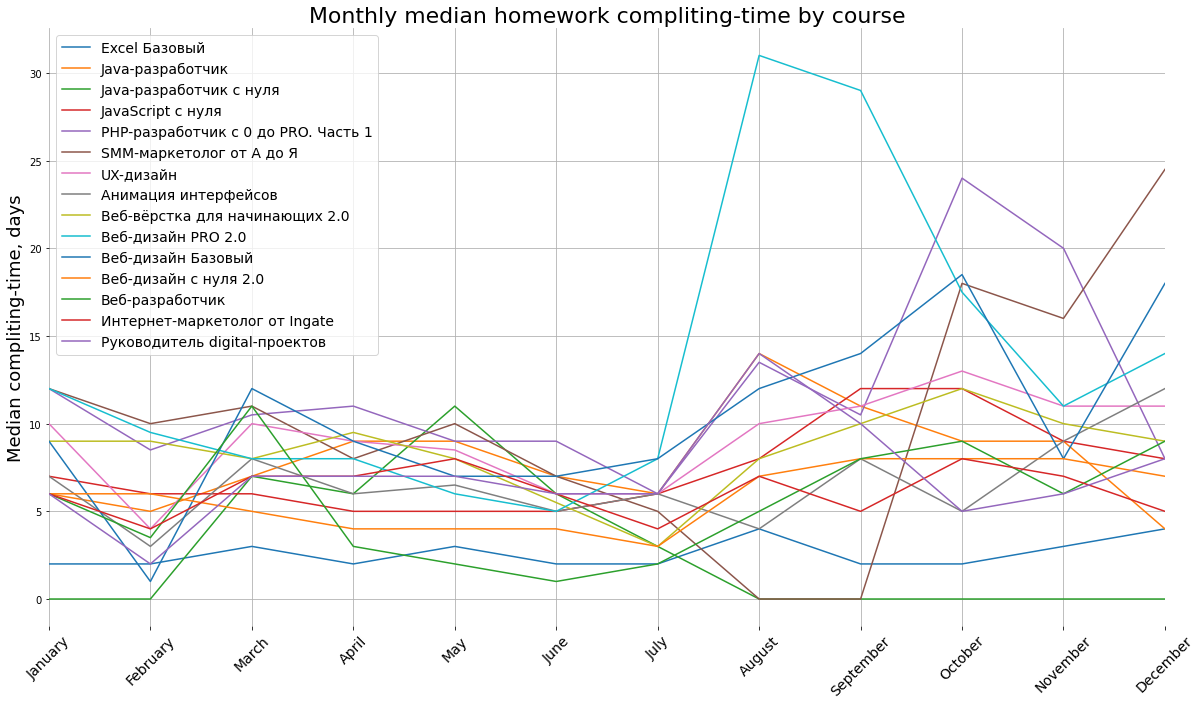

In [77]:
# сохраняем название месяцев в переменную
months = df_seasons_unstack.index
# размер графика
plt.figure(figsize=(20, 11))
# построение графика
plt.plot(months, df_seasons_unstack.iloc[:].values)
# название графика
plt.title('Monthly median homework compliting-time by course', fontsize=22)
# название оси y
plt.ylabel('Median compliting-time, days', fontsize=18)
# задаем боковые лимиты, чтобы у графика не было пропусков
plt.xlim('January', 'December')
# поворот xtick
plt.xticks(rotation=45, fontsize=14)
# сетка
plt.grid()
# убираем рамки у графика
plt.box(on=None)
plt.legend(df_seasons_unstack.columns, prop={'size': 14})
plt.show();

## Задание 3.5

In [78]:
# На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

На основе полученных данных можно сделать, что время прохождения каждого курса разнится. 
У большинства курсов самые длительные по времени выходят заключительные модули. Это ожидаемо, т.к. обычно это финальные работы по всему материалу.

На курсе **Excel Базовый** студенты тратят меньше всего дней в медианном значении на каждый модуль, не более 10.

Есть курсы, где время выполнения модуля достигает наибольших значений.   
Это **UX-дизайн**, у которого модули 9, 11 и 13 занимают около 50 дней каждый. 

**Веб-дизайн Базовый**. На выполнение заключительного модуля уходит более 60 дней.

И **PHP-разработчик с 0 до PRO. Часть 1**, где на сдачу финального модуля уходит более 80 дней. Возможно стоит узнать, почему у студентов уходит так много времени на выполнение заданий в этих курсах

Что касается сезонности выполнения домашней работы, то можно заметить, что с начала года и примерно до середины лета, студенты тратят меньше времени на сдачу своих работ. В июне и в июле медианное значение не превышает 10 дней для всех курсов.
Но начиная с августа и до конца года время на выполнение домашних работ увеличивается по всем курсам. В августе и сентябре можно увидеть резкий скачок по курсу **Веб-дизайн PRO 2.0**, 31 и 29 дней соответственно.


## 4. Расчет конверсии

1.  Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2.  Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3.  Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [79]:
# Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. 
# Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле 
# (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание 
# в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

In [80]:
# новый датасет с нужными столбцами и наличием домашки
df_conversion = main[main['is_homework']]\
                [['student_id', 'module_number', 'start_date', 'finish_date', 'course_title', 'module_title']]

In [81]:
# делаем группировку и оставляем только первую дату начала дз и последную сдачи дз
df_conv_group = df_conversion.groupby(['course_title', 'module_number', 'module_title','student_id'])\
                                .agg({'start_date': 'min', 'finish_date': 'max'}).reset_index()
df_conv_group.head()

,course_title,module_number,module_title,student_id,start_date,finish_date
0,Excel Базовый,1,Основной функционал Excel,001b192f899a84496be98b41906246fc,2019-03-29,2019-03-31
1,Excel Базовый,1,Основной функционал Excel,006f0189ec657741ee4d53474c7a258d,2019-01-25,2019-01-26
2,Excel Базовый,1,Основной функционал Excel,0074621b6955733338ab0feb2a9a2100,2019-04-10,2019-04-13
3,Excel Базовый,1,Основной функционал Excel,0098ca12f73a56dadbf6099389305d80,2019-04-03,2019-04-05
4,Excel Базовый,1,Основной функционал Excel,0203a4ab8610441e866932fb899ed583,2019-05-08,NaT


In [82]:
# группировка, подсчет кол-ва начатых и сданных дз, переименование столбцов
df_conv_group = df_conv_group.groupby(['course_title', 'module_number', 'module_title', ])\
                [['start_date', 'finish_date']].count().reset_index()\
                .rename(columns={'start_date':'started', 'finish_date':'finished'})
df_conv_group

,course_title,module_number,module_title,started,finished
0,Excel Базовый,1,Основной функционал Excel,518,458
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,406
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,387
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,303
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,270
...,...,...,...,...,...
186,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,95,88
187,Руководитель digital-проектов,13,Интеграционные проекты.,87,69
188,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,71,64
189,Руководитель digital-проектов,15,Основы технической грамотности,66,64


In [83]:
# свдиг столбца finished вниз в рамках конкретного курса
df_conv_group['finished'] = df_conv_group.groupby('course_title')['finished'].shift()

In [84]:
# вычисление конверсии. делим старт дз текущего модуля на конец дз предыдущего модуля. 
df_conv_group['conv'] = (df_conv_group['started'] / df_conv_group['finished']).fillna(1)
# создание столбца с конверсией в процентах
df_conv_group['conv_pct'] = df_conv_group['conv'] * 100
df_conv_group

,course_title,module_number,module_title,started,finished,conv,conv_pct
0,Excel Базовый,1,Основной функционал Excel,518,NaN,1.000000,100.000000
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,458.0,0.947598,94.759825
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,406.0,0.980296,98.029557
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,387.0,0.891473,89.147287
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,303.0,0.983498,98.349835
...,...,...,...,...,...,...,...
186,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,95,98.0,0.969388,96.938776
187,Руководитель digital-проектов,13,Интеграционные проекты.,87,88.0,0.988636,98.863636
188,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,71,69.0,1.028986,102.898551
189,Руководитель digital-проектов,15,Основы технической грамотности,66,64.0,1.031250,103.125000


## Задание 4.2

In [85]:
# Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 
# График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

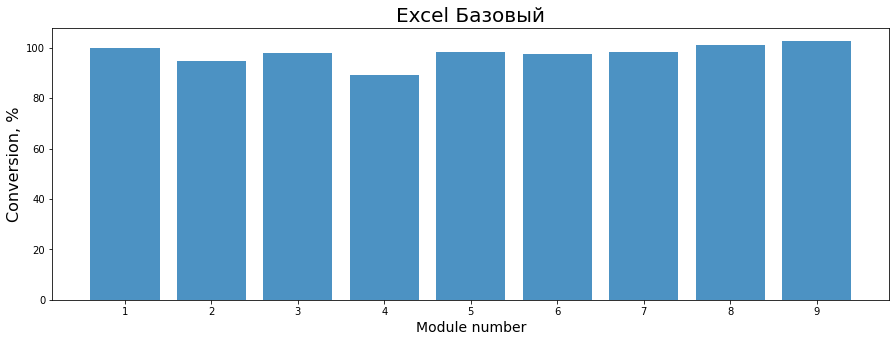

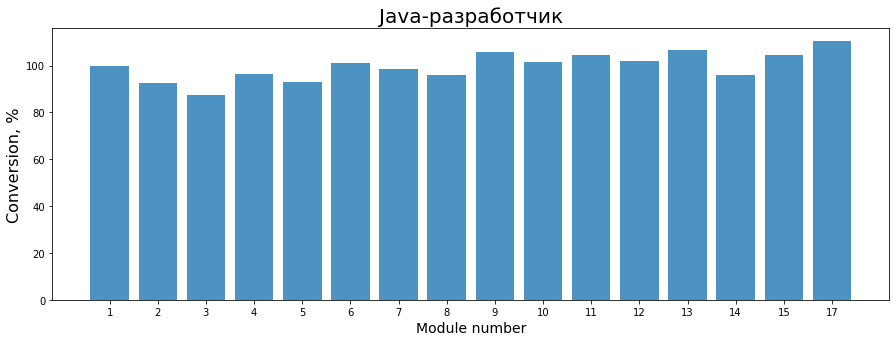

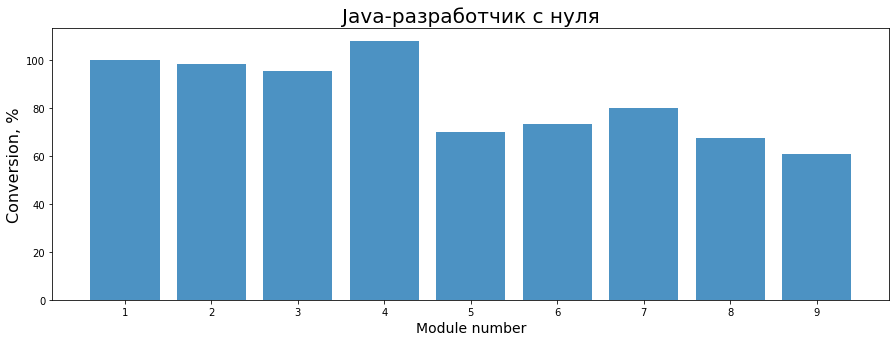

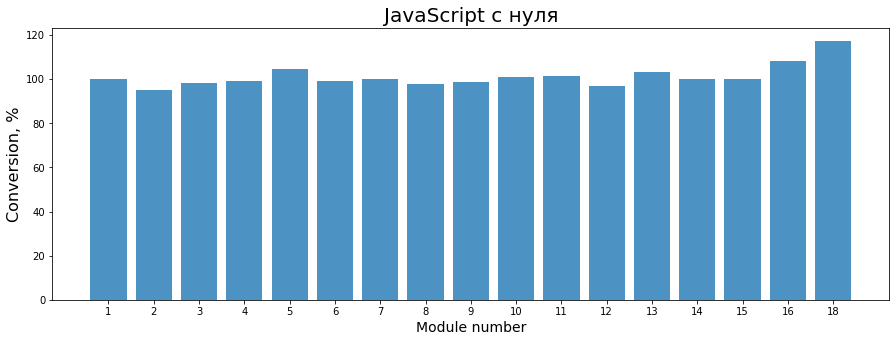

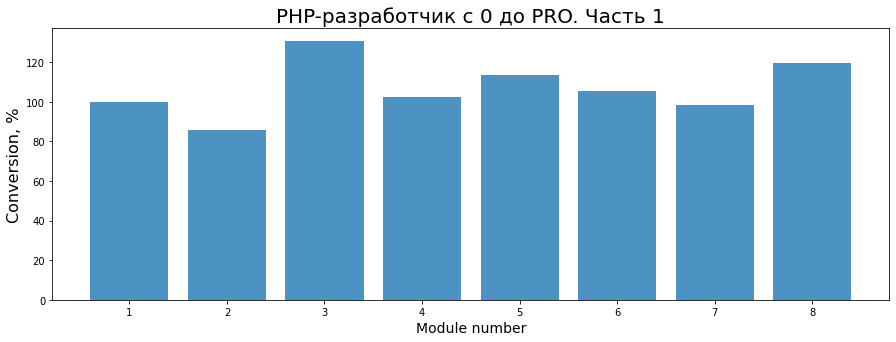

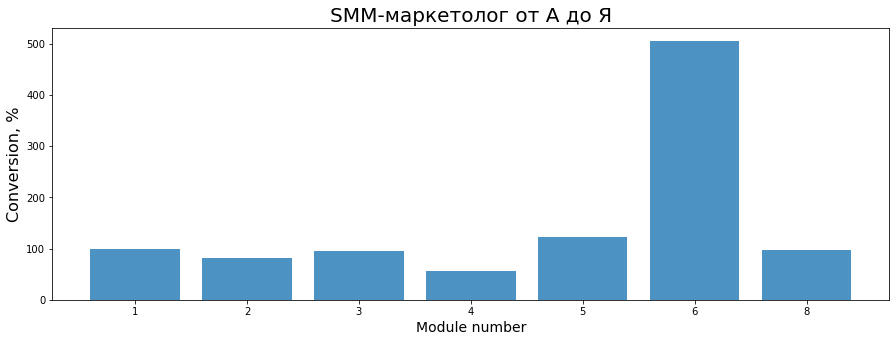

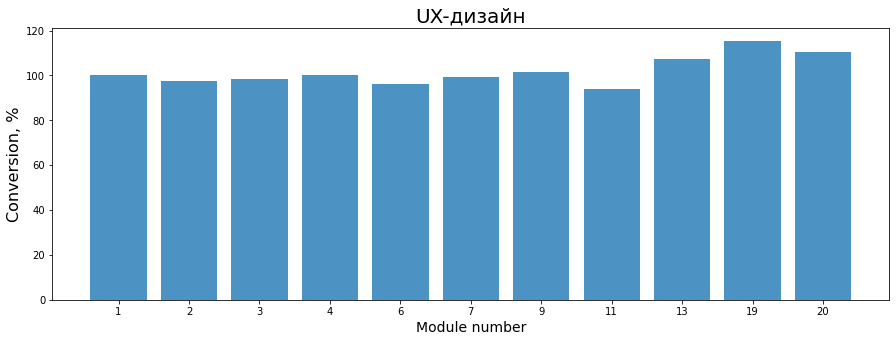

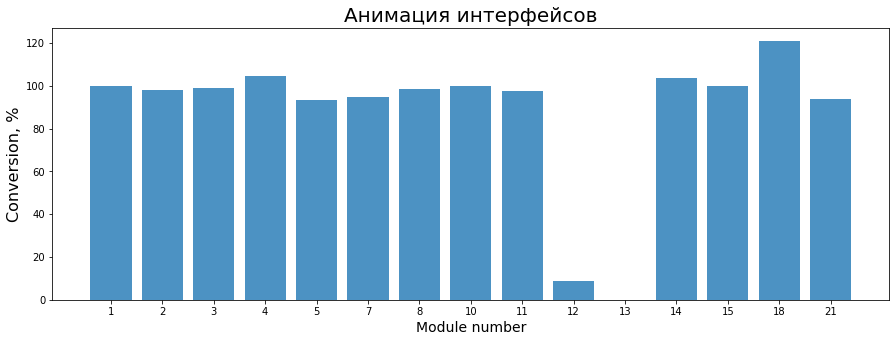

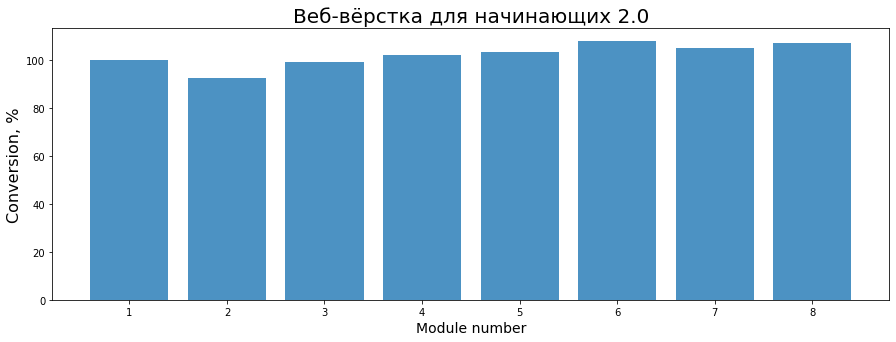

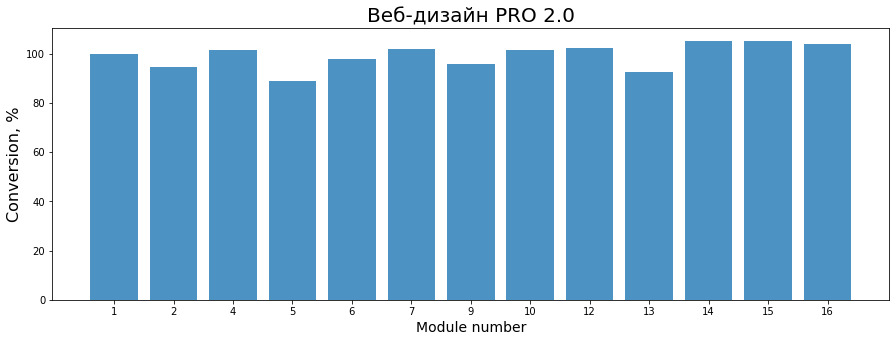

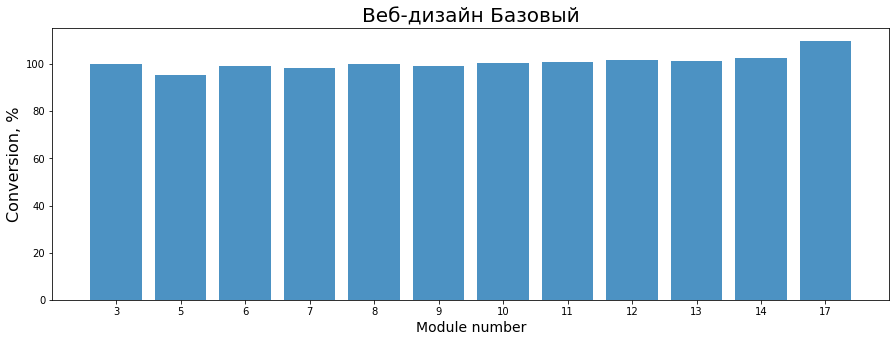

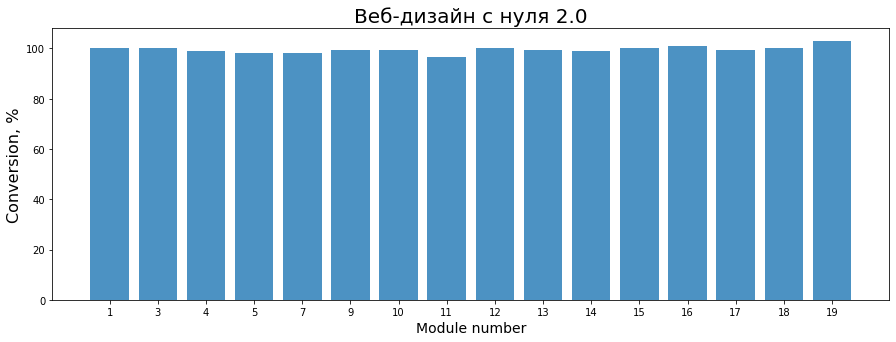

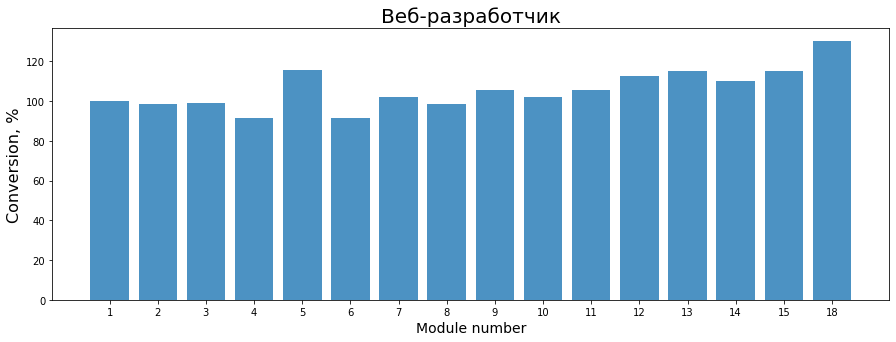

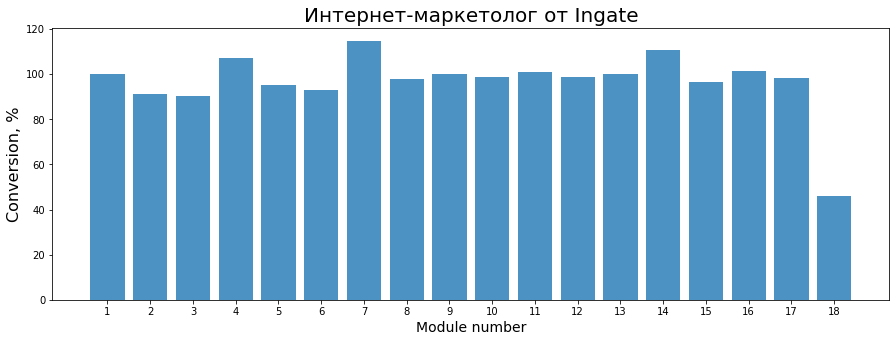

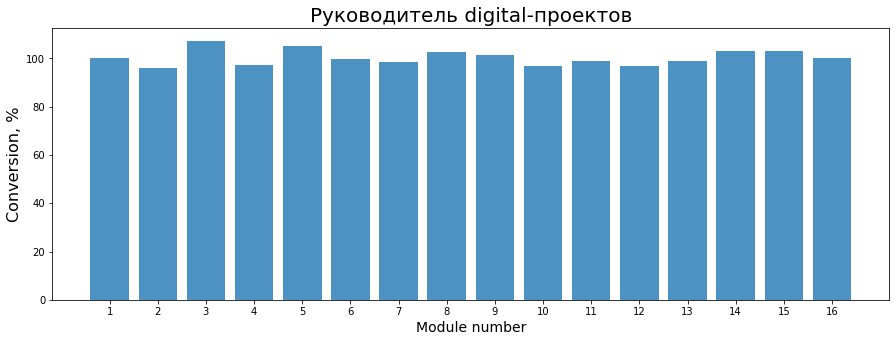

In [86]:
# формирование графиков

# сохраняем список с названиями курсов
course_list = list(df_conv_group.course_title.unique())

# по очереди строим каждый график
for i in range(15):
    # задаем размер
    plt.figure(figsize=(15, 5))
    # сохраняем название текущего курса в переменную
    course = course_list[i]
    # сохраняем список номеров модулей и перевод в str для удобного отображения
    modules_numbers_list = list(df_conv_group[df_conv_group['course_title'] == course].module_number.astype('str'))
    # значения конверсии для текущего курса
    conversions = df_conv_group[df_conv_group['course_title'] == course]['conv_pct'].values
    # строим график
    plt.bar(modules_numbers_list, conversions, alpha=0.8)
    # название оси y
    plt.ylabel('Conversion, %', fontsize=16)
    # название графика
    plt.title(course, fontsize=20)
    plt.xticks(modules_numbers_list)
    plt.xlabel('Module number', fontsize=14)
    plt.show();

## Задание 4.3

In [87]:
# Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, 
# отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. 
# Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. 
# Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). 
# Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. 
# У медианы должен быть свой цвет. Рамок у графиков быть не должно

In [88]:
# добавляем в датасет столбец со сферами и удаляем ненужные столбцы
df_conv_final = df_conv_group.merge(courses, how='left', on='course_title').drop(columns=['id', 'conv', 'started', 'finished'])
df_conv_final.head()

,course_title,module_number,module_title,conv_pct,course_field
0,Excel Базовый,1,Основной функционал Excel,100.000000,Business
1,Excel Базовый,2,Основной функционал Excel (продолжение),94.759825,Business
2,Excel Базовый,3,Формулы и функции Excel. Введение,98.029557,Business
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,89.147287,Business
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,98.349835,Business


In [89]:
colors

{'Marketing': 'royalblue',
 'Design': 'salmon',
 'Development': 'limegreen',
 'Business': 'khaki'}

In [90]:
# добавляем столбец с цветами для каждой сферы
df_conv_final['colors'] = df_conv_final['course_field'].map(colors)
# сортируем по номеру модуля в обратном порядке для более удобного отображения на графике
df_conv_final = df_conv_final.sort_values(by=['course_title', 'module_number'], ascending=False)
df_conv_final.head()

,course_title,module_number,module_title,conv_pct,course_field,colors
190,Руководитель digital-проектов,16,Контроль. Риски. Поощрения. Наказания. Обратна...,100.000000,Business,khaki
189,Руководитель digital-проектов,15,Основы технической грамотности,103.125000,Business,khaki
188,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,102.898551,Business,khaki
187,Руководитель digital-проектов,13,Интеграционные проекты.,98.863636,Business,khaki
186,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,96.938776,Business,khaki


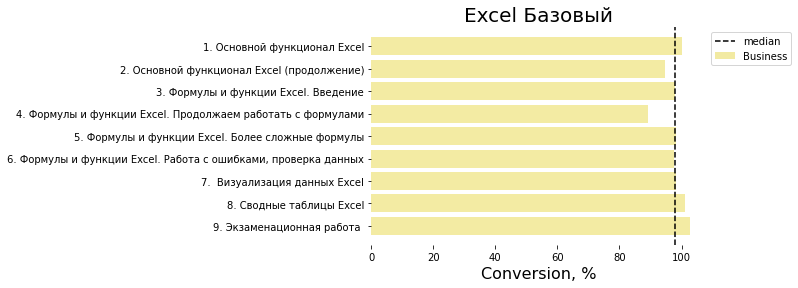

Median of conversion: 98


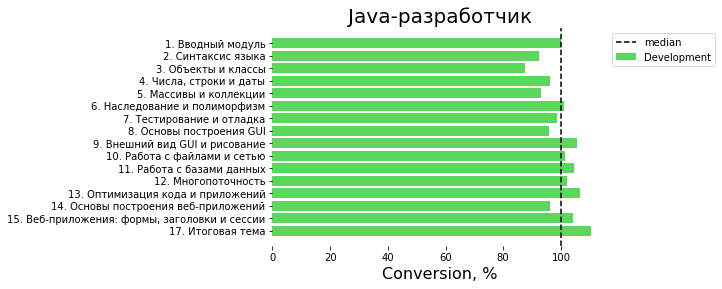

Median of conversion: 100


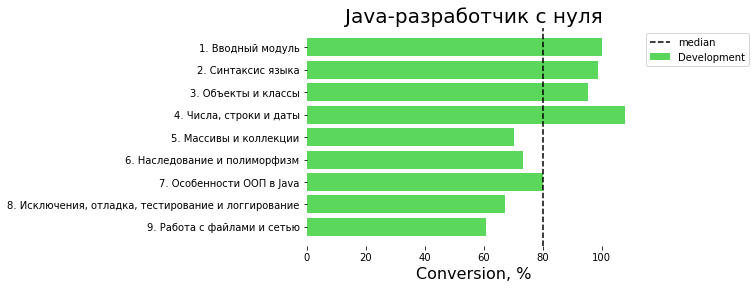

Median of conversion: 80


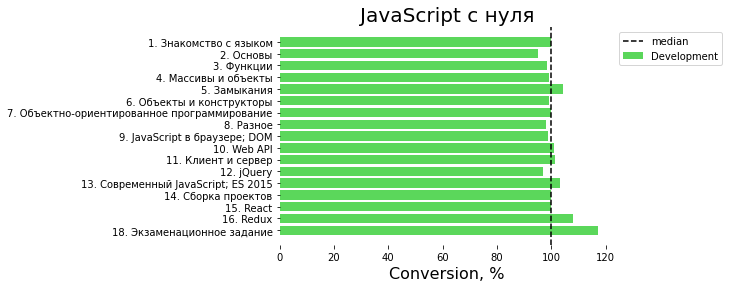

Median of conversion: 100


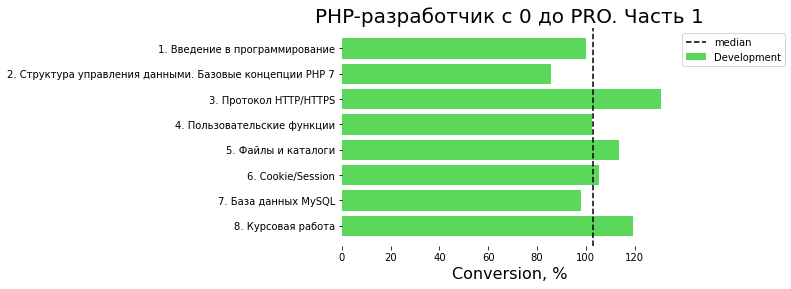

Median of conversion: 103


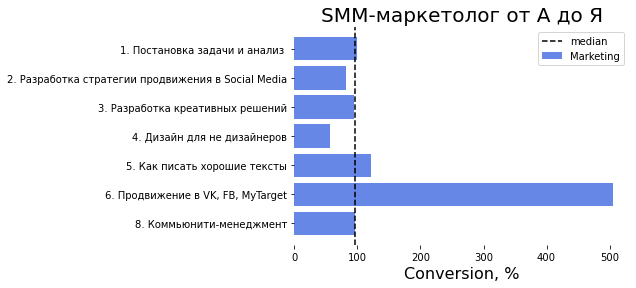

Median of conversion: 96


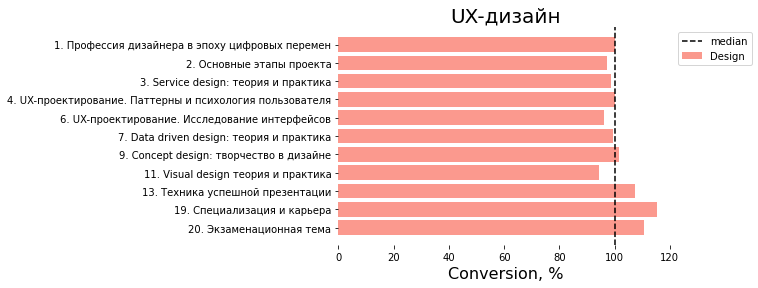

Median of conversion: 100


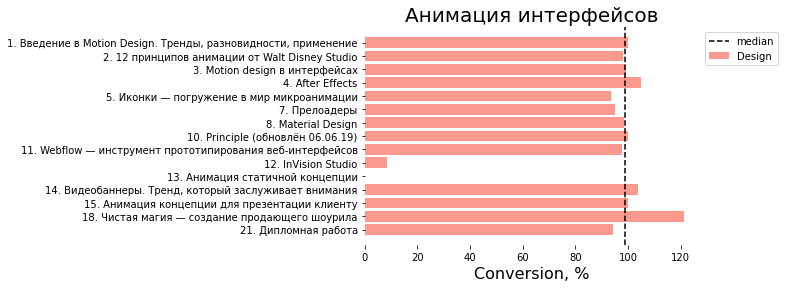

Median of conversion: 99


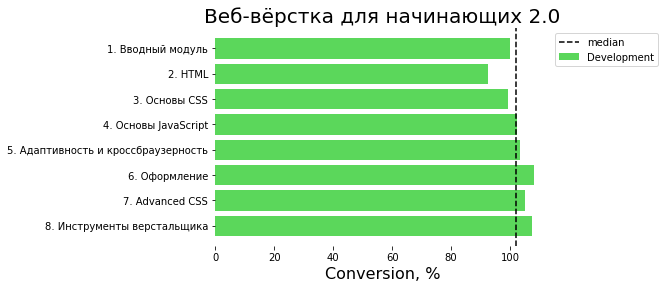

Median of conversion: 102


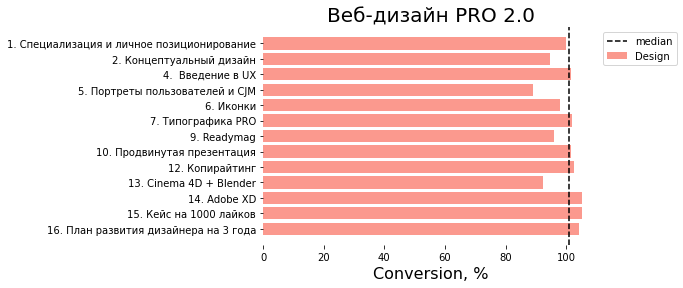

Median of conversion: 101


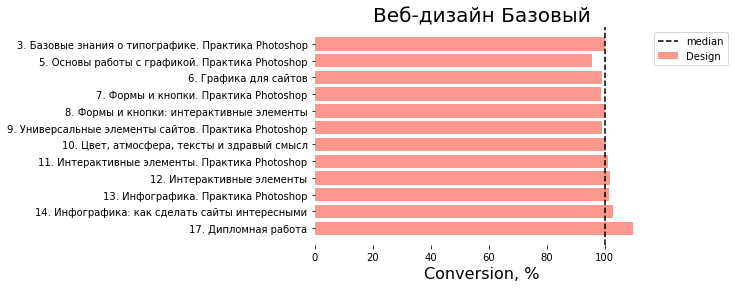

Median of conversion: 100


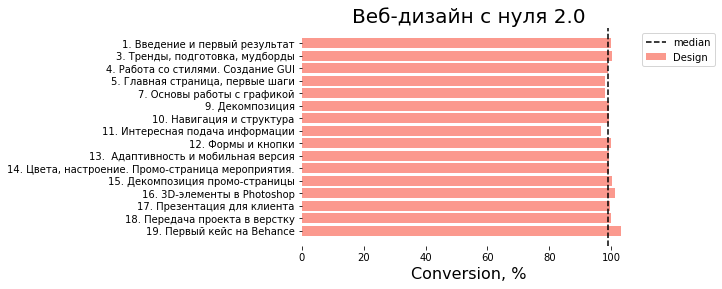

Median of conversion: 99


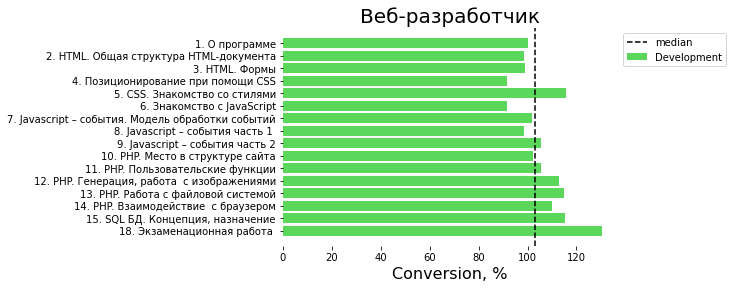

Median of conversion: 103


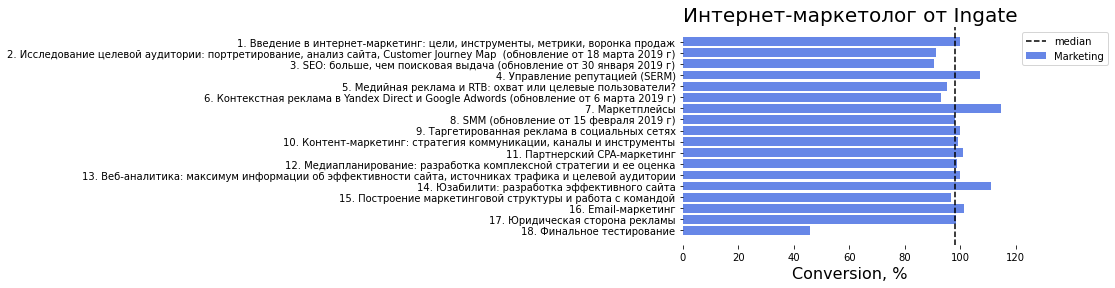

Median of conversion: 98


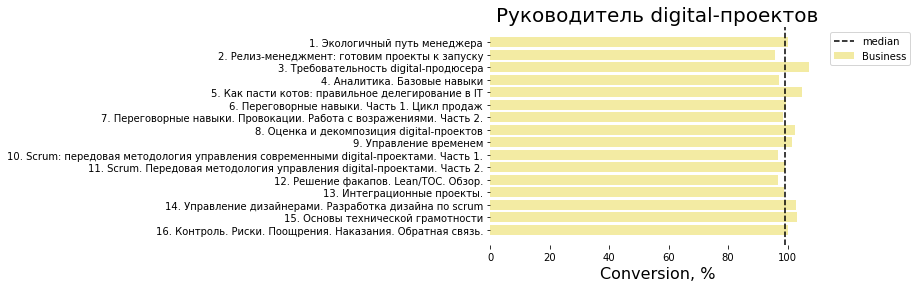

Median of conversion: 99


In [91]:
# поочередное построение графиков
for i in range(15):
    # название текущего курса
    course = course_list[i]
    # список модулей текущего курса
    modules_list = list(df_conv_final[df_conv_final['course_title'] == course]['module_title'])
    # номера модулей текущего курса
    numbers_list = df_conv_final[df_conv_final['course_title'] == course]['module_number']
    # значения конверсии модулей для текущего курса
    conversions = df_conv_final[df_conv_final['course_title'] == course]['conv_pct'].values
    # цвет сферы для текущего курса
    color = df_conv_final[df_conv_final['course_title'] == course]['colors'].values
    # название сферы текущего курса
    field = df_conv_final[df_conv_final['course_title'] == course]['course_field'].values[0]
    # список с нумерацией и названием модулей текущего курса
    yticklabels = [str(number) + '. ' + title for number, title in zip(numbers_list, modules_list)]
    # построение графика
    plt.barh(yticklabels, conversions, label=course, color=color, alpha=0.8)
    # названия для меток оси y
    plt.yticks(yticklabels)
    # название осо x
    plt.xlabel('Conversion, %', fontsize=16)
    # заголовок графика
    plt.title(course, fontsize=20)
    # вычисляем медиану для всех модулей курса
    median_conv = int(np.median(conversions))
    # линия медианы
    median_line = plt.axvline(median_conv, color='k', linestyle='--', label='median')
    # убираем рамки у графика
    plt.box(on=None)
    # легенда с название сферы и линии медины
    plt.legend(labels = ['median', field],  bbox_to_anchor=(1, 1))
    plt.show()
    
    print(f'Median of conversion: {median_conv}')

## Задание 4.4

In [92]:
# На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

У большинства курсов средняя медианна по всем модулям близка к 100 процентам. Это очень хороший показатель и говорит о высокой конверсии.

Единственный курс, у которого медианна конверсии 80 процентов, это курс **Java-разработчик c нуля**. Начиная с 5-ого модуля конверсия выходит меньше 80 процентов. Нужно дополнительно выяснить, почему она падает именно в этом месте.

На курсе **SMM-маркетолог от А до Я** есть проблемный модуль номер 4, с конверсией близкой к 50 и 6-ой модуль, с аномальной конверсией свыше 500. Такая высокая конверсия вызвана особенностью платформы. Возможно студенты игнорируют 5-ый модуль и выполняют сразу 6-ой, так как он им более интересен. Либо 5-ый модуль оказался более сложным, чем 6-ой

Также отклонения от нормы есть на курсах **Анимация интерфейсов**, модули 12 и 13, и **Интернет-маркетолог от Ingate**, заключительный 18-ый модуль. В целом причины таких низких конверсий, может быть следствием отсутствия интереса у студентов, либо трудностью домашних заданий. Такие модули нужно разбирать отдельно и выявлять причину. 